# t-SNE on MNIST Handwritten Digits Dataset

In [1]:
# import required modules
import numpy as np # for matrix multiplication
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import pandas as pd             # for data handling
from sklearn.preprocessing import StandardScaler # for column standardization
from sklearn.manifold import TSNE # for t-SNE
import time # for time measurement
import multiprocessing # for threading
import imageio # for GIF creation

In [2]:
print(multiprocessing.cpu_count())

12


In [3]:
# Read dataset
#d0 = pd.read_csv('./../../AAIC-Course/datasets/mnist-digits-dataset/train.csv')
d0 = pd.read_csv('./../../../datasets/mnist-digits-dataset/train.csv')
d0.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
# split the dataset into features and labels
d_labels_all = d0['label']
d_data_all = d0.drop('label',axis=1)
print(d_labels_all.shape,d_data_all.shape)

(42000,) (42000, 784)


In [5]:
def genTSNEGif(std_data, ndp, p, itr_list, img_name):
    '''
    Fuction which genrate t-SNE visualtion for each itr_list using given ndp and p
    Generates a GIF and stores it under '{img_name}.gif'
    Where:
    std_data - Column Standardized Data
    ndp - Number of Data Points to consider in std_data
    p - Perplexity
    itr_list - List of iterations, each iteration will be a frame in GIF
    img_name - Name of GIF image
    '''
    
    print('No.Of Data Points - {0}, Perplexity - {1}, Iterations - {2}, ImageName - {3}'.format(
         ndp, p, itr_list, img_name))
    
    # list to hold the frames
    frames = []
    
    p_data = standardized_data[0:ndp,:]
    p_labels = d_train_labels[0:ndp]
    #print('t-SNE Data Points {0} and its Labels {1}'.format(p_data.shape, p_labels.shape))
    
    for itr_val in itr_list:
        img_title = 'ndp={0} p={1} itr={2}'.format(ndp, p, itr_val)
        time_start = time.time()
        
        model = TSNE(n_components=2,random_state=0,perplexity=p,n_iter=itr_val)
        
        tsne_data = model.fit_transform(p_data)
        time_elapsed = time.time() - time_start
        print('{0} ==> t-SNE done! Time elapsed: {1} seconds'.format(img_title, time.time() - time_start))
        
        tsne_data = np.vstack((tsne_data.T,p_labels)).T
        #print(tsne_data.shape)
        #tsne_data[:4]
        
        tsne_df = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2','label'])
        #tsne_df.head()

        g = sns.FacetGrid(tsne_df,hue='label',height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend();
        
        g.fig.suptitle(img_title)
        g.fig.canvas.draw()
        
        image = np.frombuffer(g.fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(g.fig.canvas.get_width_height()[::-1] + (3,))

        frames.append(image)
    
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./{}.gif'.format(img_name), frames, fps=1)
    
    return

## Training Size - 15000

In [ ]:
# Taking 15000 images for training
training_size = 15000

d_train_labels = d_labels_all.head(training_size)
d_train_data = d_data_all.head(training_size)
print('Shape of Training Data {0}, Label {1}'.format(d_train_data.shape, d_train_labels.shape) )

# standardize the data
standardized_data = StandardScaler().fit_transform(d_train_data.astype(np.float64))
standardized_data.shape

Shape of Training Data (15000, 784), Label (15000,)


(15000, 784)

### t-SNE over 1000 data points

No.Of Data Points - 1000, Perplexity - 30, Iterations - range(1000, 10001, 1000), ImageName - t_15000_d_1000_p_30
ndp=1000 p=30 itr=1000 ==> t-SNE done! Time elapsed: 8.767564296722412 seconds
ndp=1000 p=30 itr=2000 ==> t-SNE done! Time elapsed: 15.281407833099365 seconds
ndp=1000 p=30 itr=3000 ==> t-SNE done! Time elapsed: 21.917317628860474 seconds
ndp=1000 p=30 itr=4000 ==> t-SNE done! Time elapsed: 28.54077696800232 seconds
ndp=1000 p=30 itr=5000 ==> t-SNE done! Time elapsed: 35.208890199661255 seconds
ndp=1000 p=30 itr=6000 ==> t-SNE done! Time elapsed: 42.100470781326294 seconds
ndp=1000 p=30 itr=7000 ==> t-SNE done! Time elapsed: 48.63226270675659 seconds
ndp=1000 p=30 itr=8000 ==> t-SNE done! Time elapsed: 55.15706443786621 seconds
ndp=1000 p=30 itr=9000 ==> t-SNE done! Time elapsed: 62.33098077774048 seconds
ndp=1000 p=30 itr=10000 ==> t-SNE done! Time elapsed: 65.65820598602295 seconds


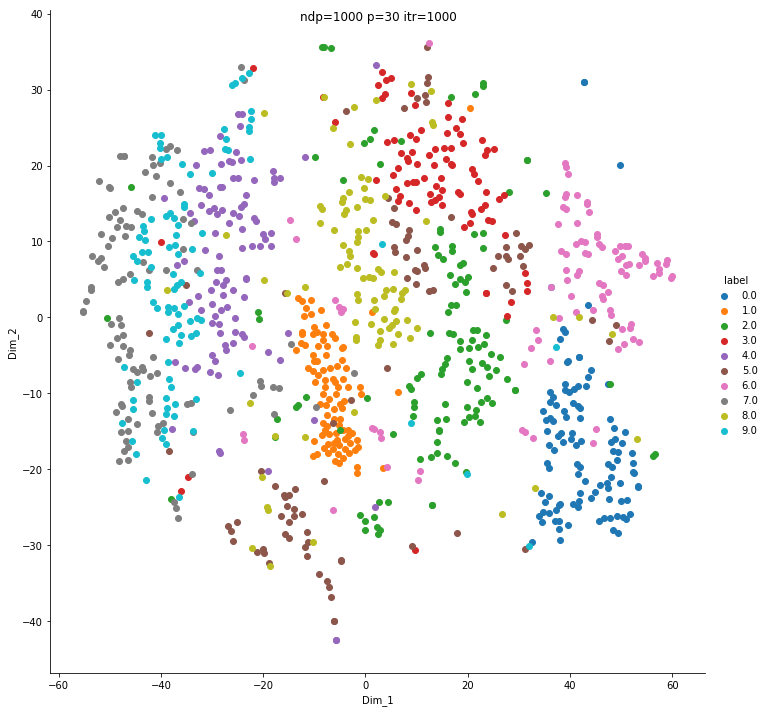

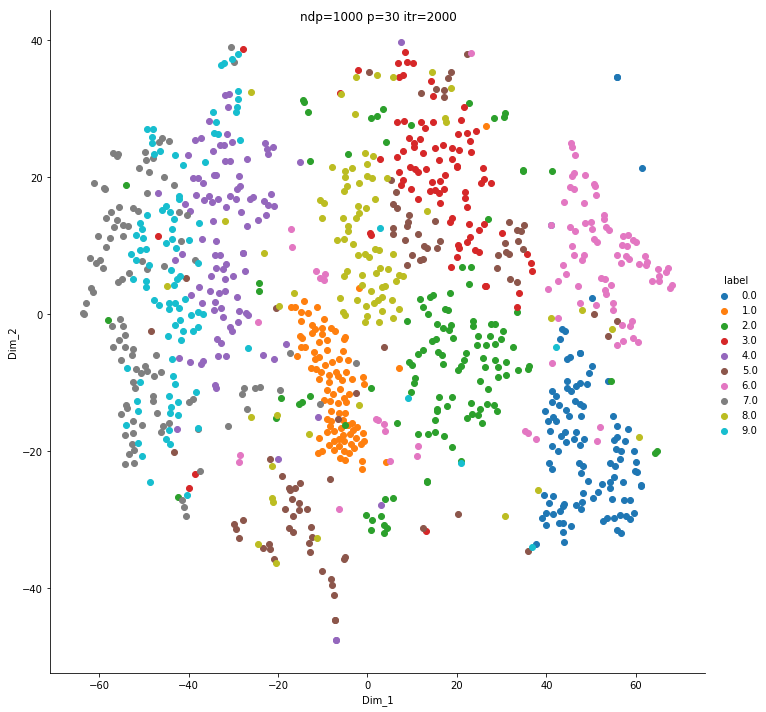

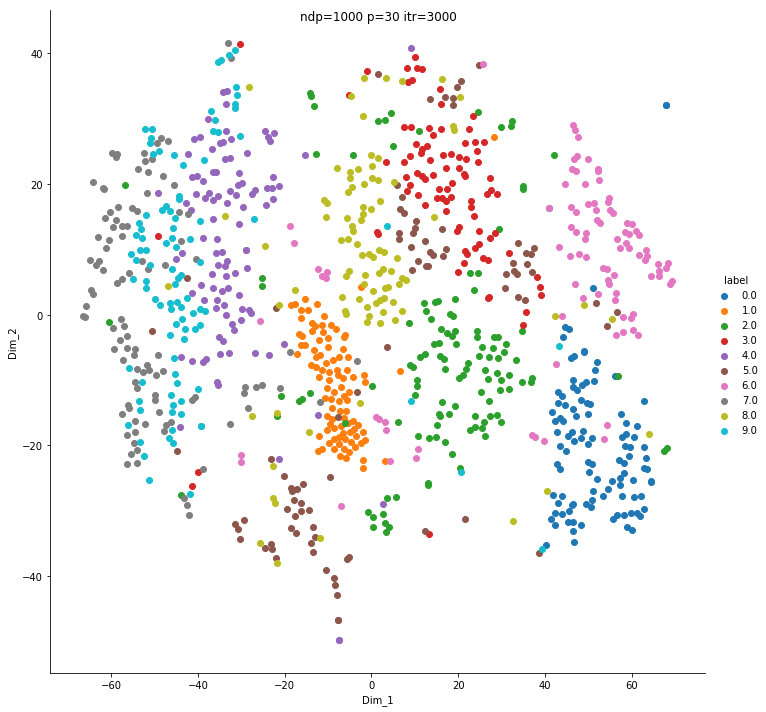

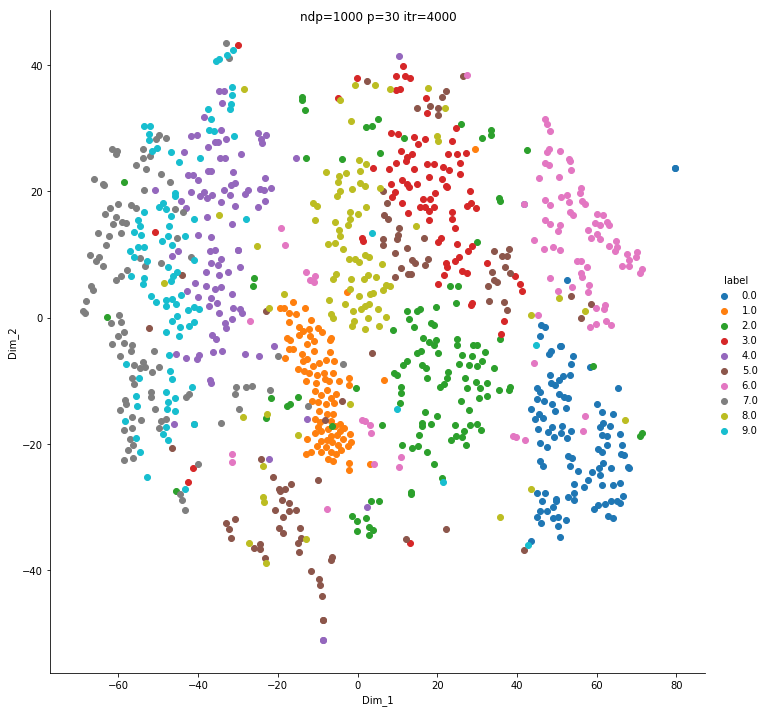

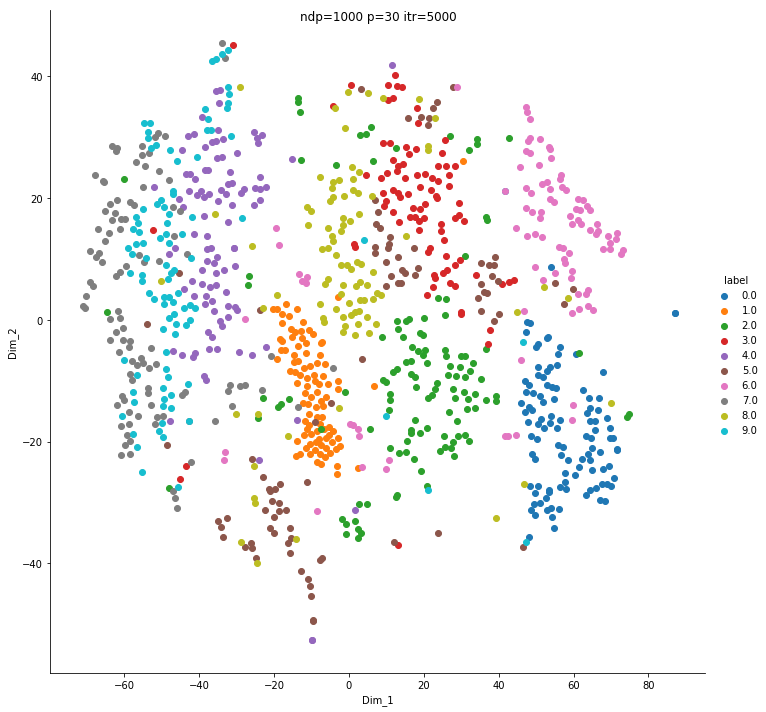

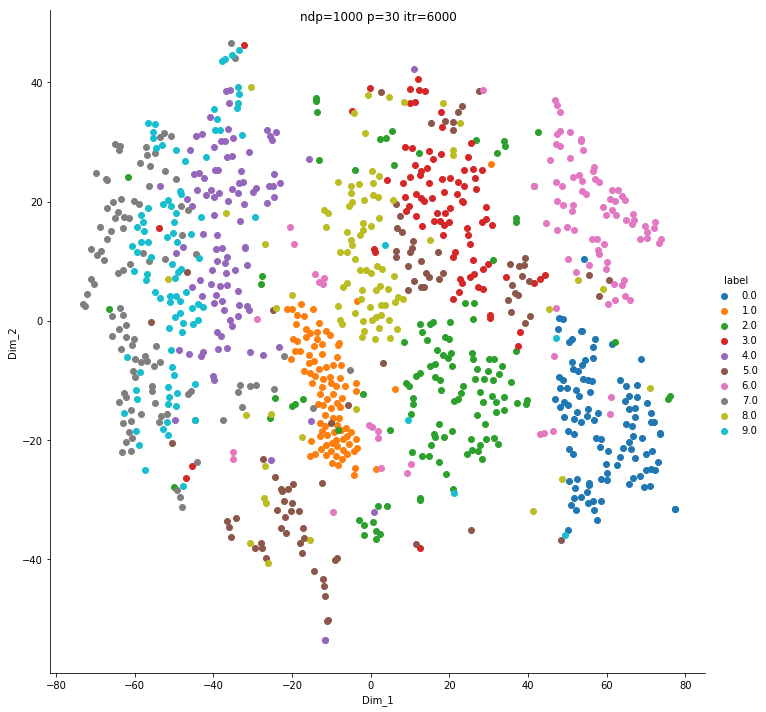

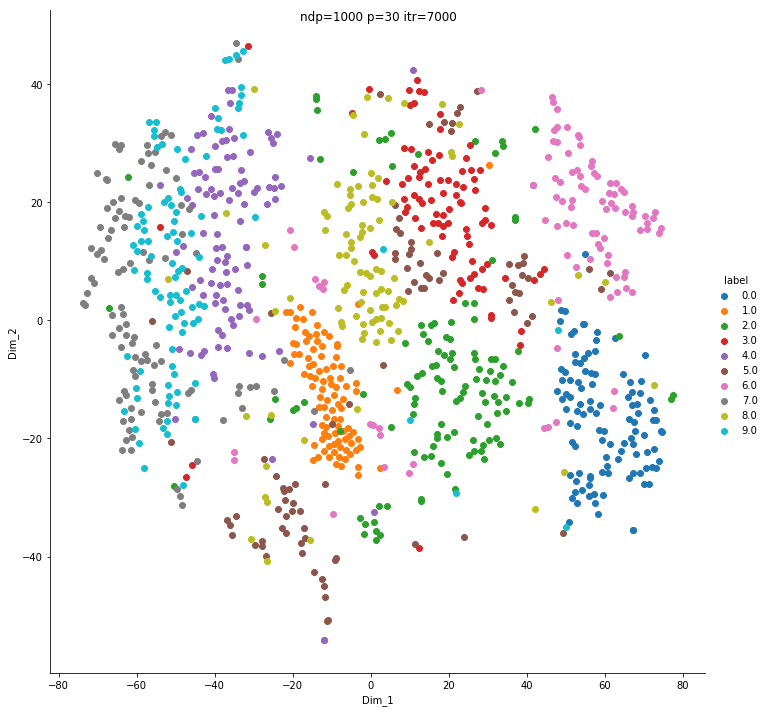

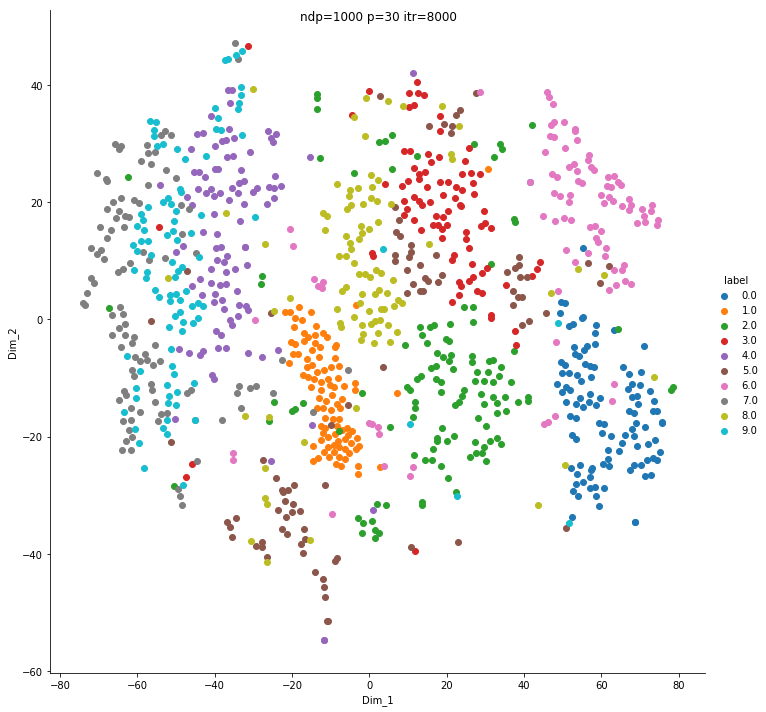

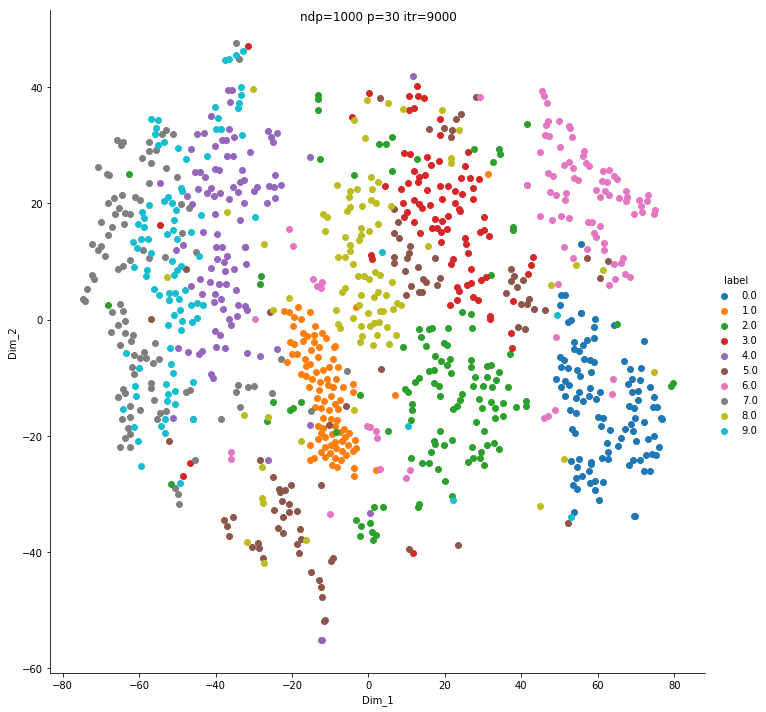

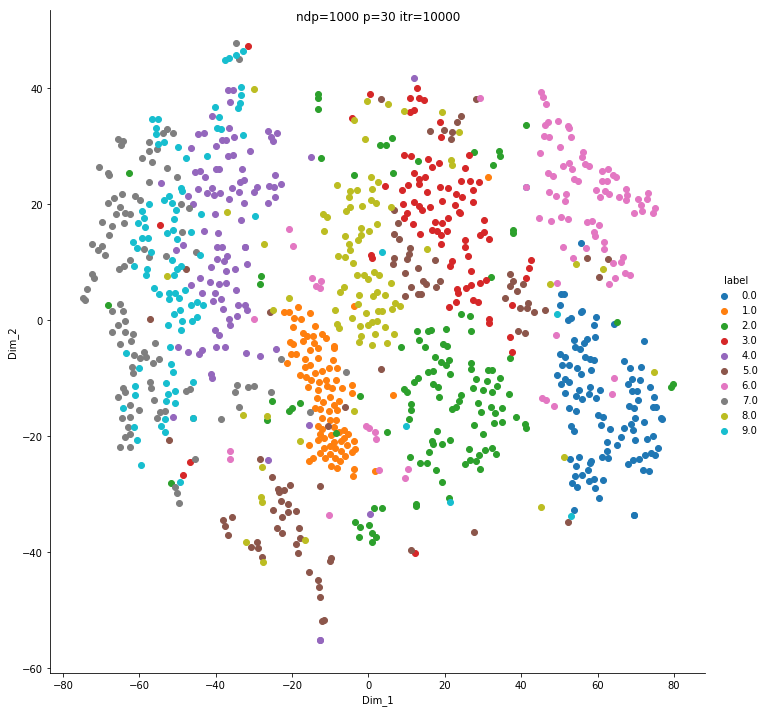

In [ ]:
genTSNEGif(standardized_data, 1000, 30, range(1000,10001,1000), 't_15000_d_1000_p_30')

No.Of Data Points - 1000, Perplexity - 50, Iterations - range(1000, 10001, 1000), ImageName - t_15000_d_1000_p_50
ndp=1000 p=50 itr=1000 ==> t-SNE done! Time elapsed: 10.508925676345825 seconds
ndp=1000 p=50 itr=2000 ==> t-SNE done! Time elapsed: 19.109923362731934 seconds
ndp=1000 p=50 itr=3000 ==> t-SNE done! Time elapsed: 26.708609580993652 seconds
ndp=1000 p=50 itr=4000 ==> t-SNE done! Time elapsed: 33.94826126098633 seconds
ndp=1000 p=50 itr=5000 ==> t-SNE done! Time elapsed: 41.6116144657135 seconds
ndp=1000 p=50 itr=6000 ==> t-SNE done! Time elapsed: 48.758673429489136 seconds
ndp=1000 p=50 itr=7000 ==> t-SNE done! Time elapsed: 51.300100326538086 seconds
ndp=1000 p=50 itr=8000 ==> t-SNE done! Time elapsed: 50.943241357803345 seconds
ndp=1000 p=50 itr=9000 ==> t-SNE done! Time elapsed: 51.112380266189575 seconds
ndp=1000 p=50 itr=10000 ==> t-SNE done! Time elapsed: 51.14729022979736 seconds


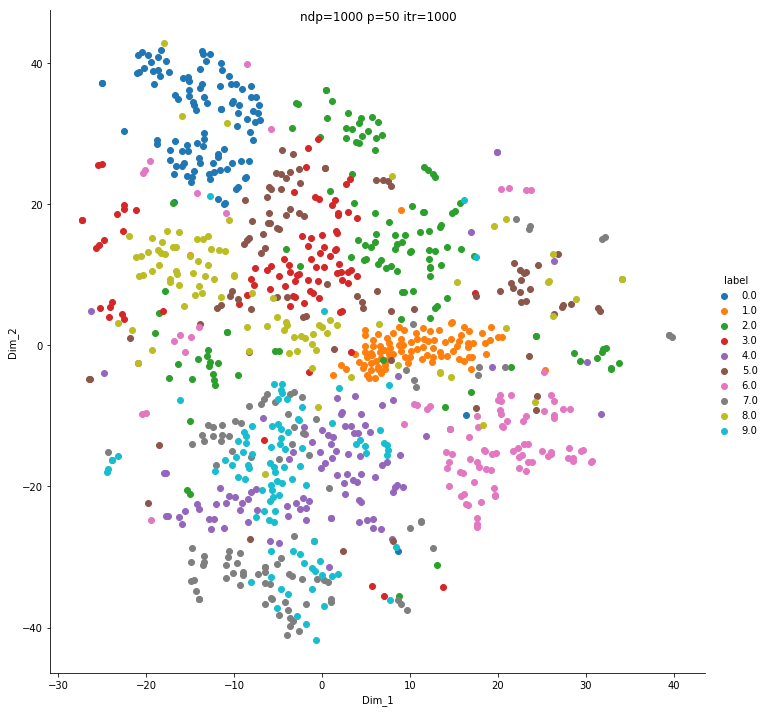

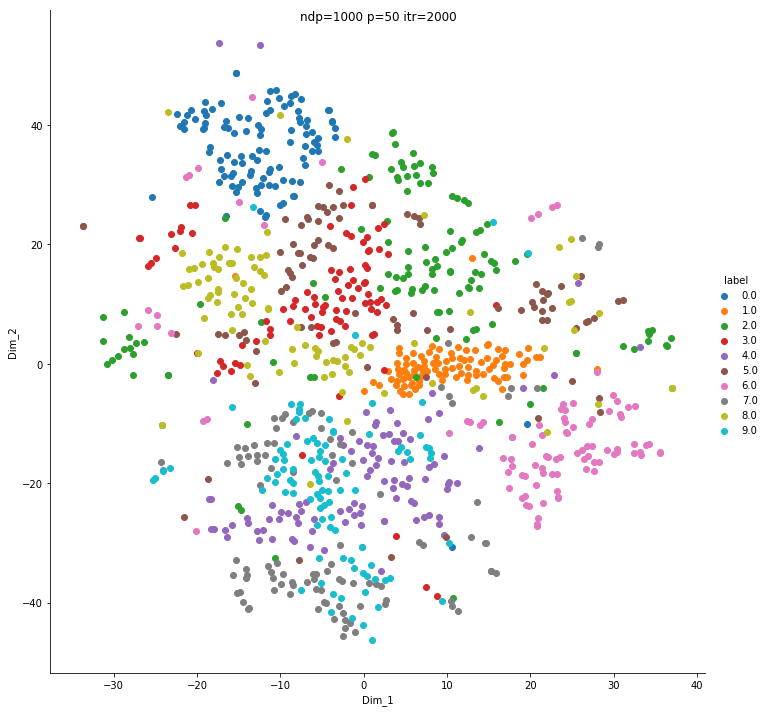

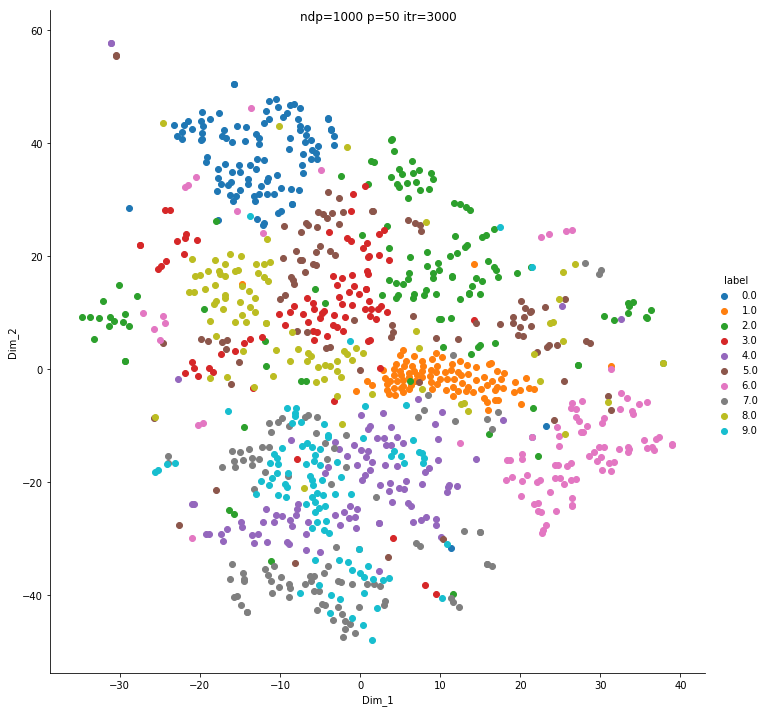

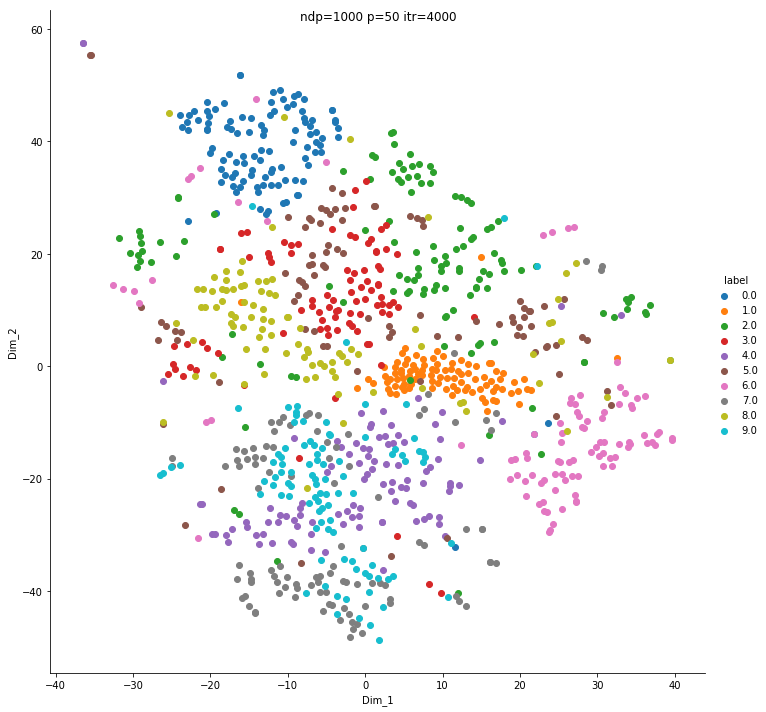

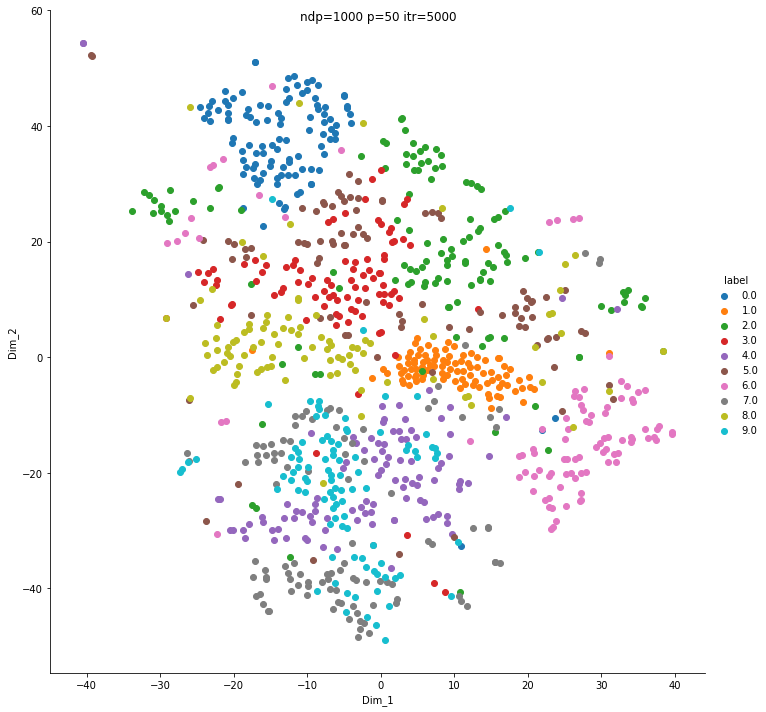

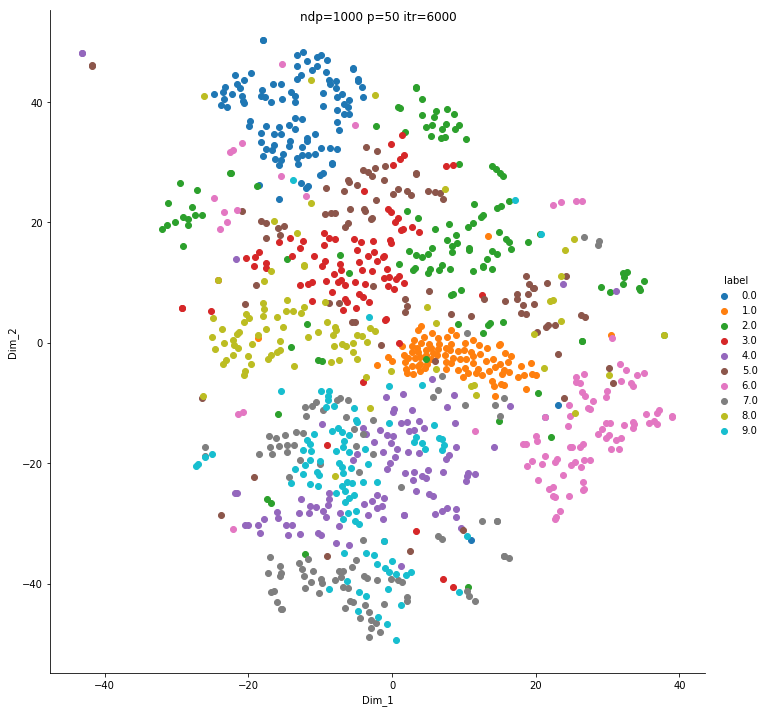

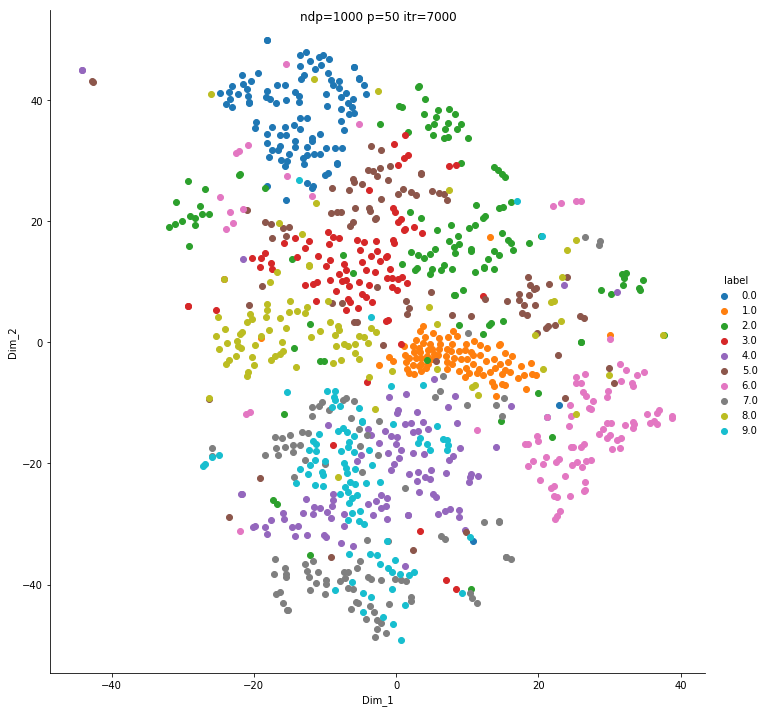

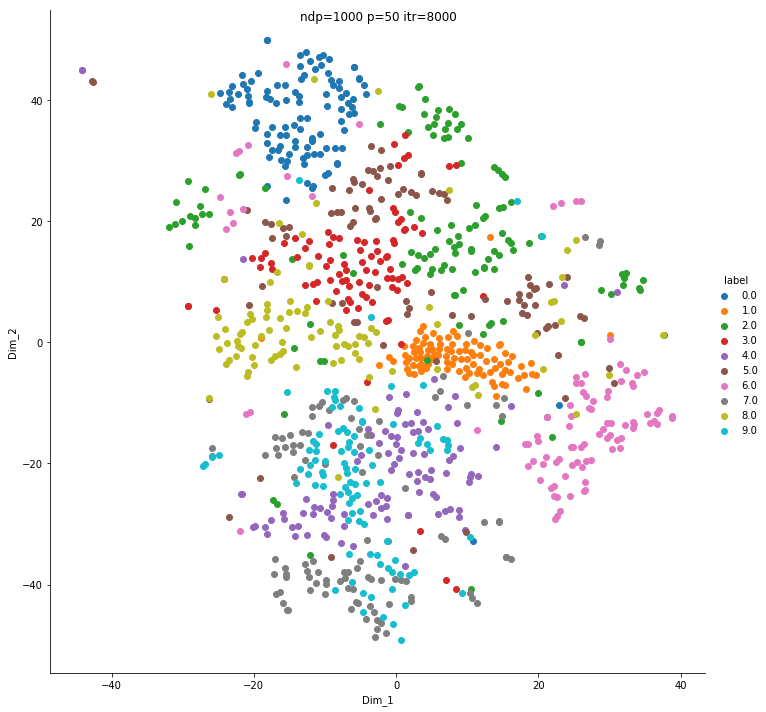

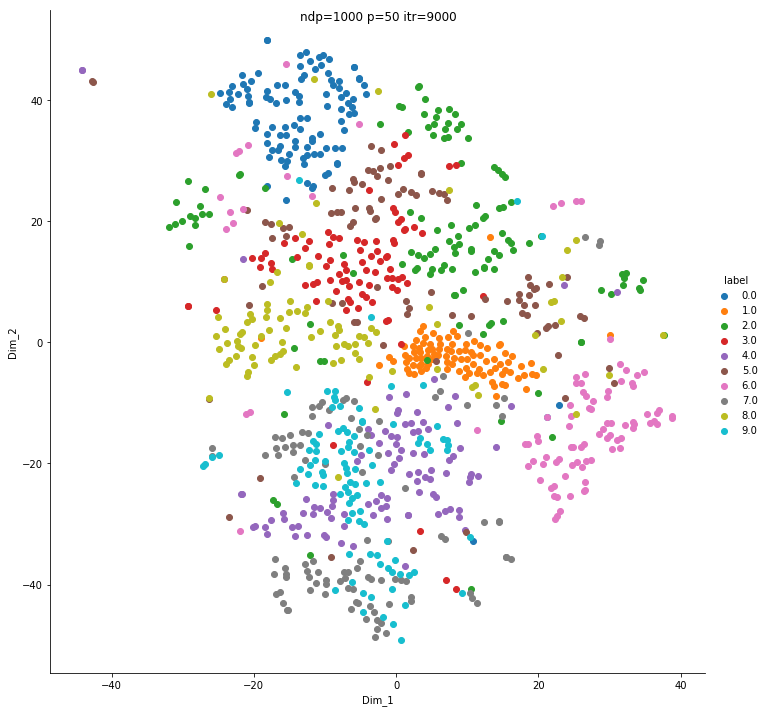

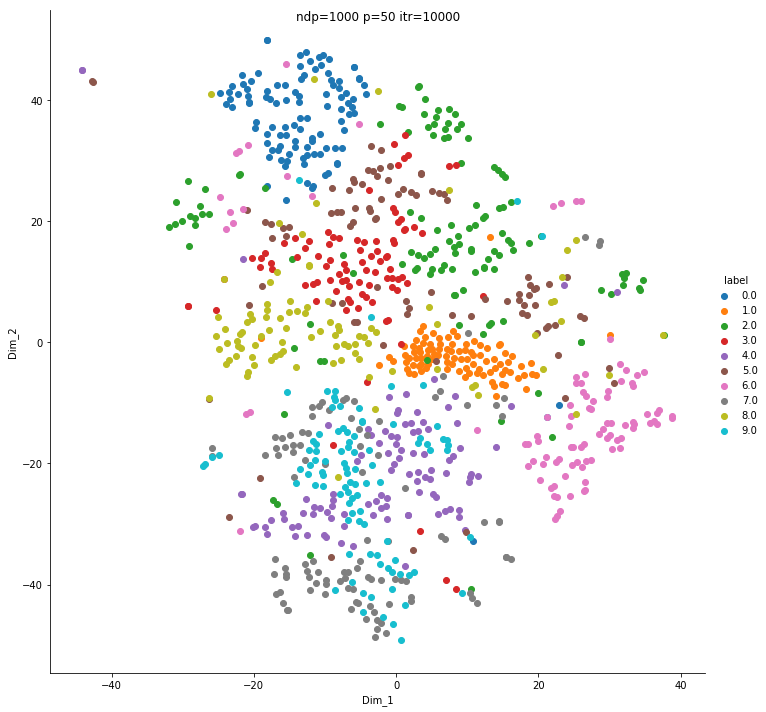

In [ ]:
genTSNEGif(standardized_data, 1000, 50, range(1000,10001,1000), 't_15000_d_1000_p_50')

### t-SNE over 5000 data points

No.Of Data Points - 5000, Perplexity - 30, Iterations - range(1000, 10001, 1000), ImageName - t_15000_d_5000_p_30
ndp=5000 p=30 itr=1000 ==> t-SNE done! Time elapsed: 74.58964729309082 seconds
ndp=5000 p=30 itr=2000 ==> t-SNE done! Time elapsed: 116.96771430969238 seconds
ndp=5000 p=30 itr=3000 ==> t-SNE done! Time elapsed: 158.1489634513855 seconds
ndp=5000 p=30 itr=4000 ==> t-SNE done! Time elapsed: 199.8348081111908 seconds
ndp=5000 p=30 itr=5000 ==> t-SNE done! Time elapsed: 239.5248773097992 seconds
ndp=5000 p=30 itr=6000 ==> t-SNE done! Time elapsed: 281.1372809410095 seconds
ndp=5000 p=30 itr=7000 ==> t-SNE done! Time elapsed: 319.49059796333313 seconds
ndp=5000 p=30 itr=8000 ==> t-SNE done! Time elapsed: 355.5566313266754 seconds
ndp=5000 p=30 itr=9000 ==> t-SNE done! Time elapsed: 391.9184534549713 seconds
ndp=5000 p=30 itr=10000 ==> t-SNE done! Time elapsed: 427.03921484947205 seconds


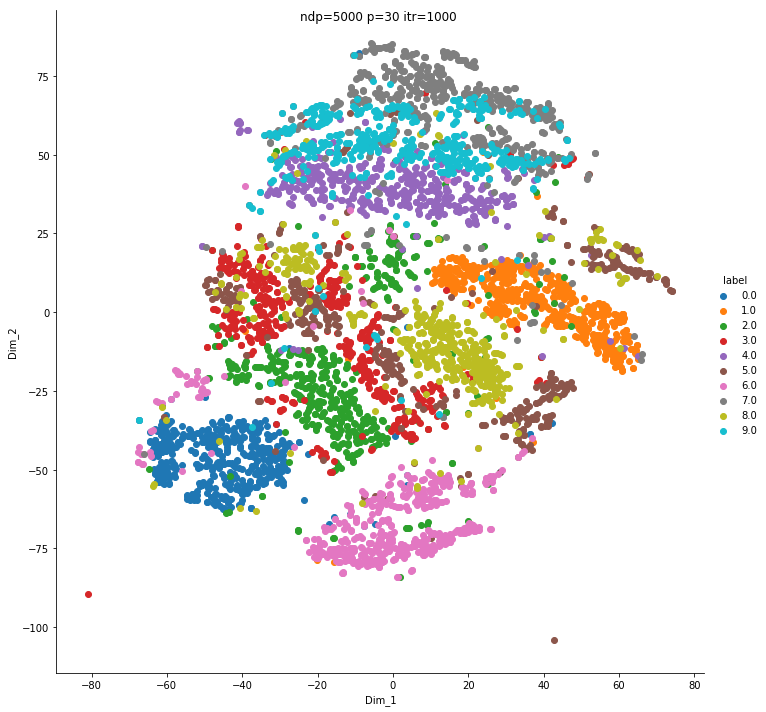

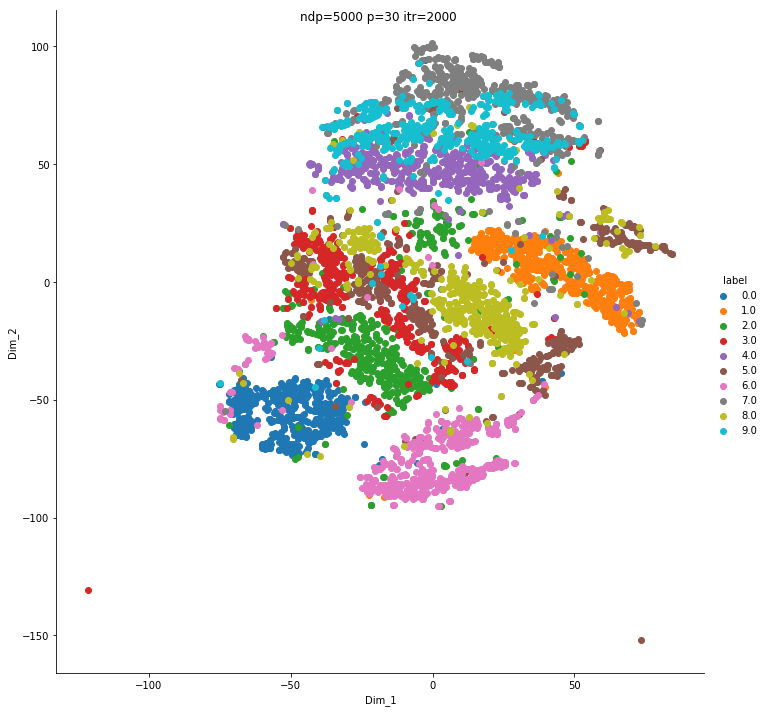

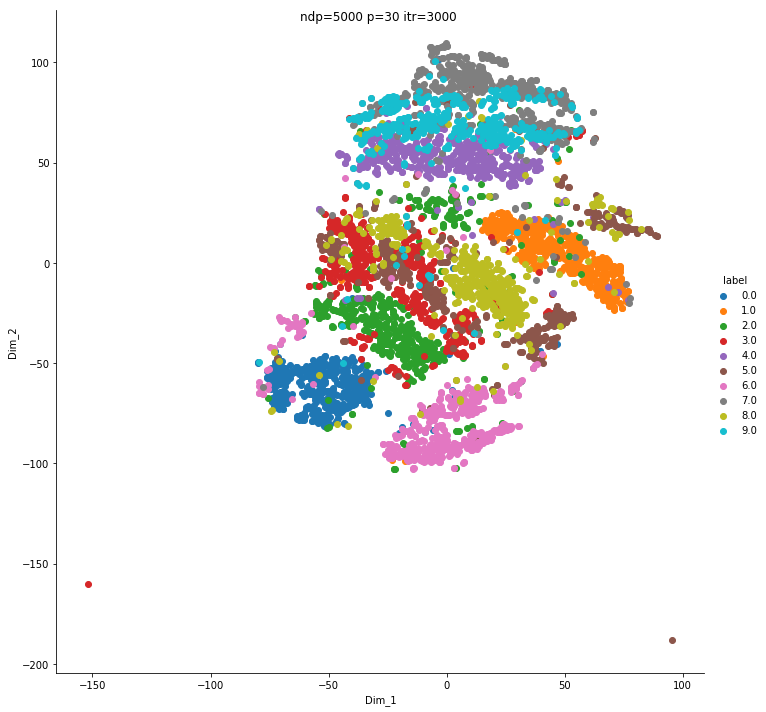

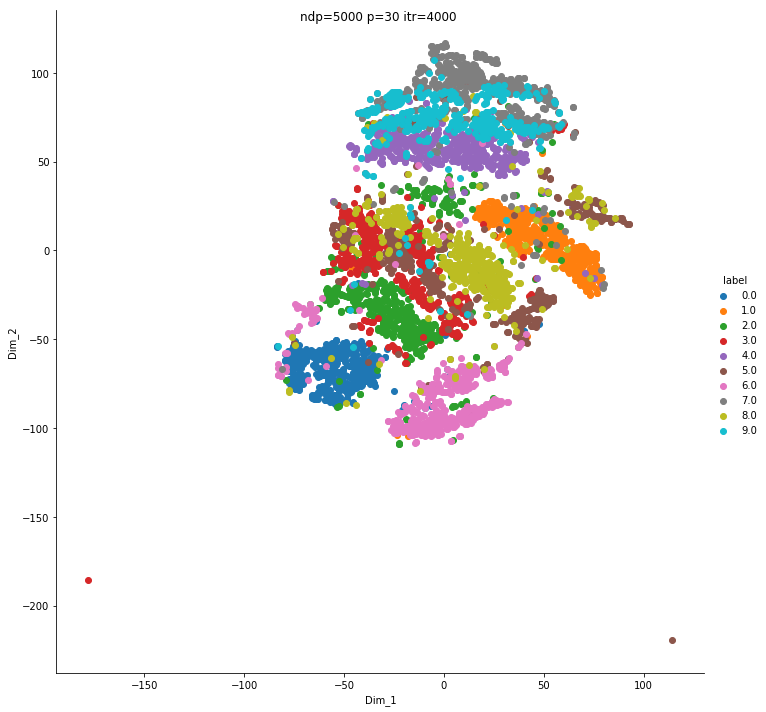

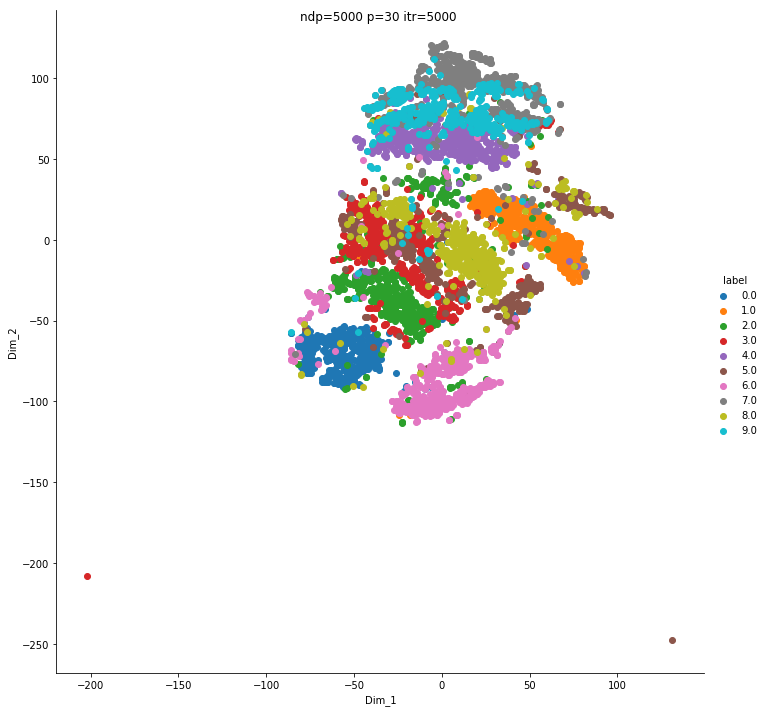

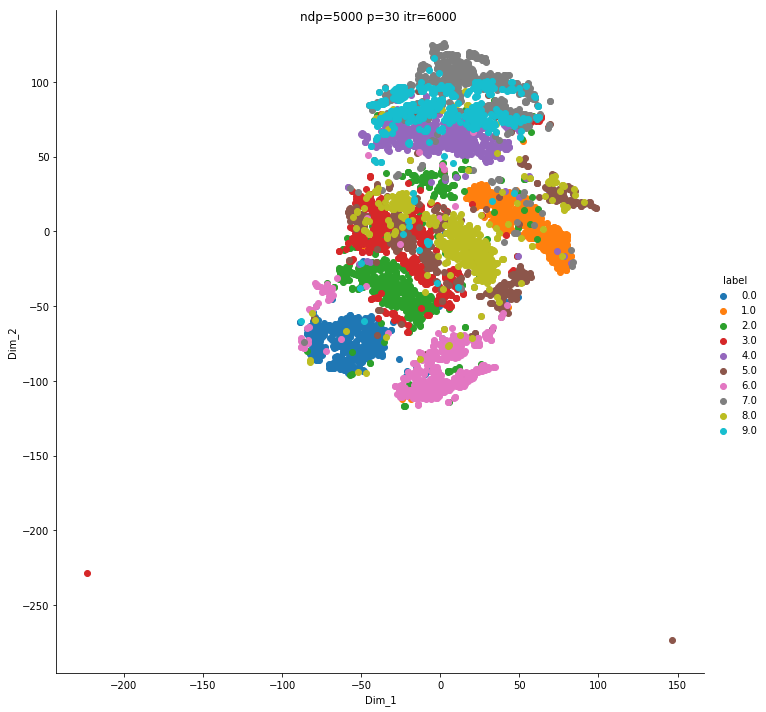

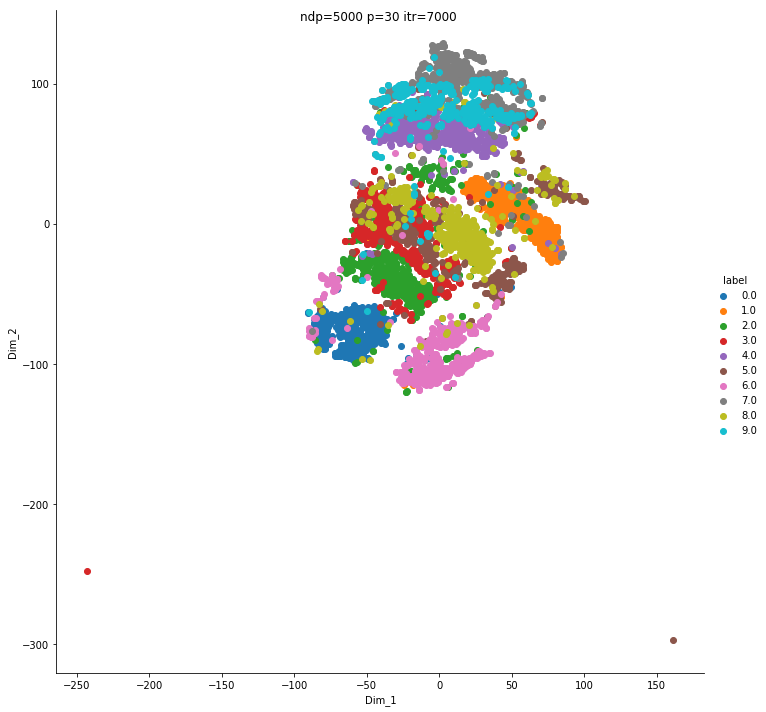

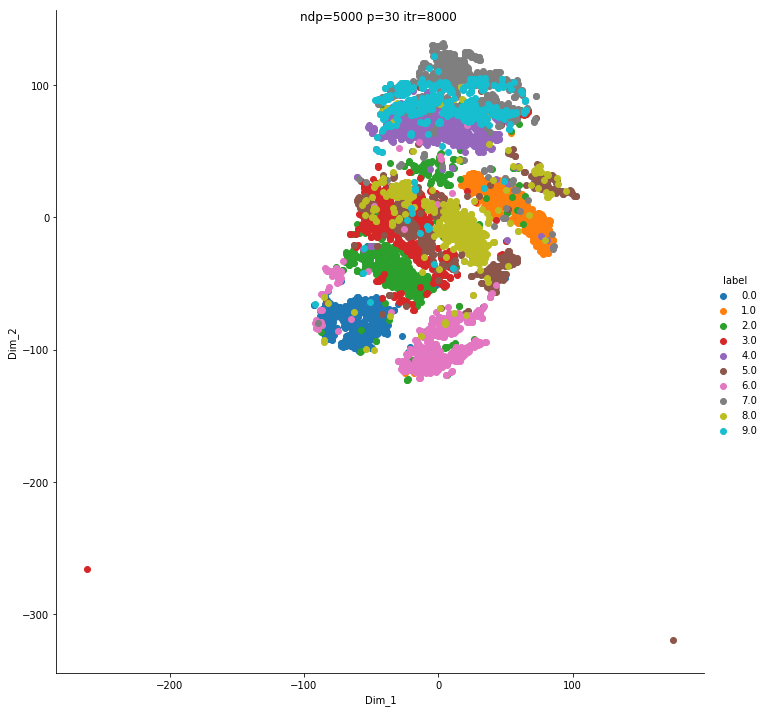

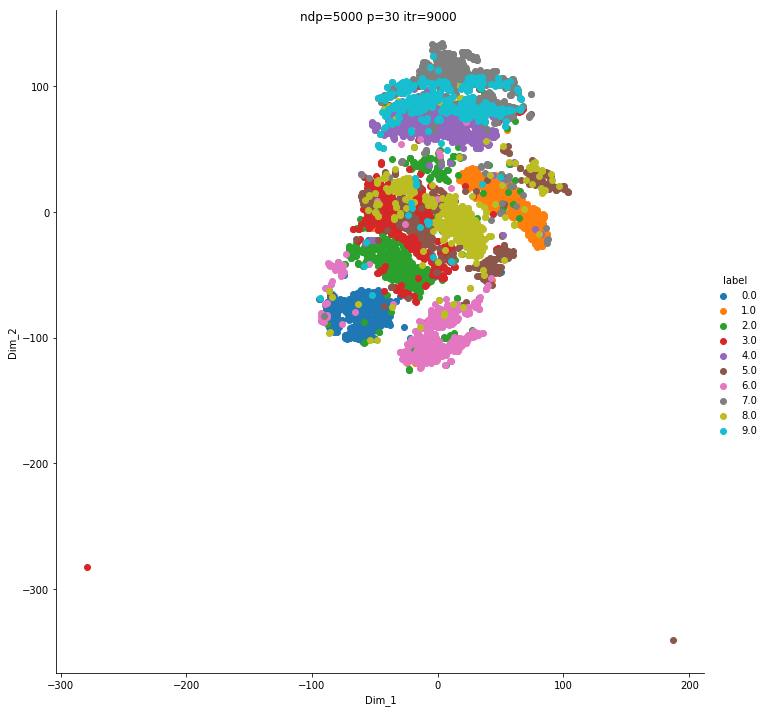

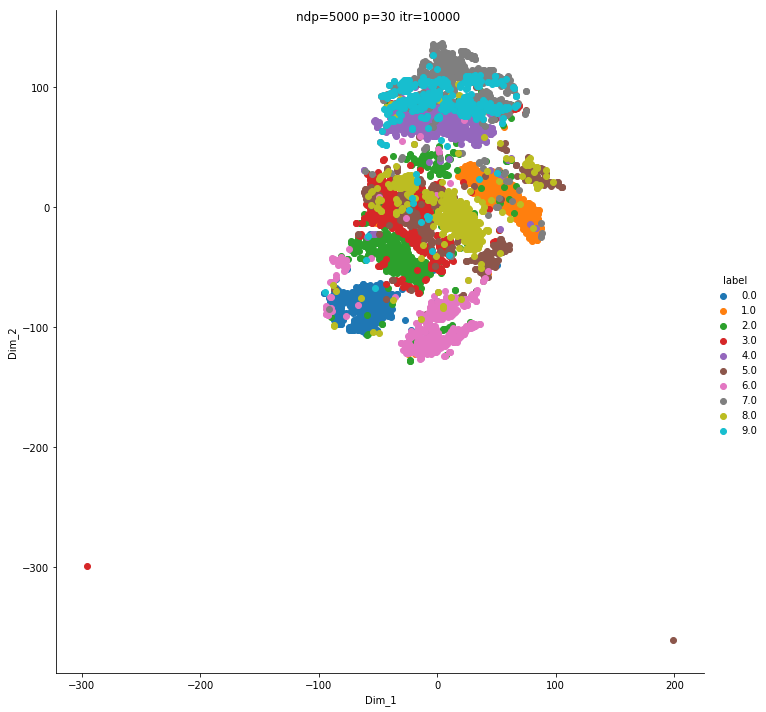

In [ ]:
genTSNEGif(standardized_data, 5000, 30, range(1000,10001,1000), 't_15000_d_5000_p_30')

No.Of Data Points - 5000, Perplexity - 50, Iterations - range(1000, 10001, 1000), ImageName - t_15000_d_5000_p_50
ndp=5000 p=50 itr=1000 ==> t-SNE done! Time elapsed: 83.9416823387146 seconds
ndp=5000 p=50 itr=2000 ==> t-SNE done! Time elapsed: 137.22521495819092 seconds
ndp=5000 p=50 itr=3000 ==> t-SNE done! Time elapsed: 194.28370428085327 seconds
ndp=5000 p=50 itr=4000 ==> t-SNE done! Time elapsed: 253.0855348110199 seconds
ndp=5000 p=50 itr=5000 ==> t-SNE done! Time elapsed: 314.7297682762146 seconds
ndp=5000 p=50 itr=6000 ==> t-SNE done! Time elapsed: 378.68981170654297 seconds
ndp=5000 p=50 itr=7000 ==> t-SNE done! Time elapsed: 444.68101239204407 seconds
ndp=5000 p=50 itr=8000 ==> t-SNE done! Time elapsed: 514.4695074558258 seconds
ndp=5000 p=50 itr=9000 ==> t-SNE done! Time elapsed: 575.7889912128448 seconds
ndp=5000 p=50 itr=10000 ==> t-SNE done! Time elapsed: 642.7859194278717 seconds


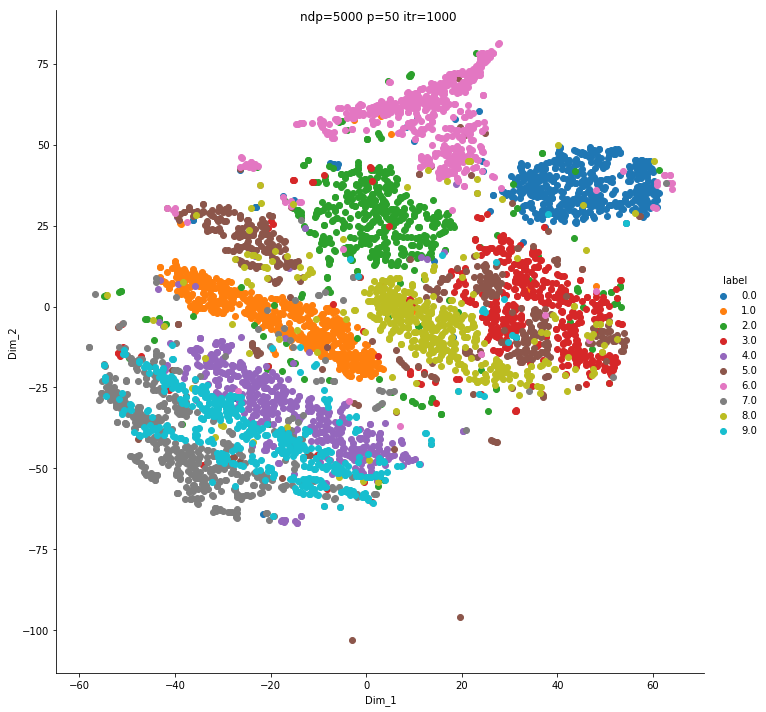

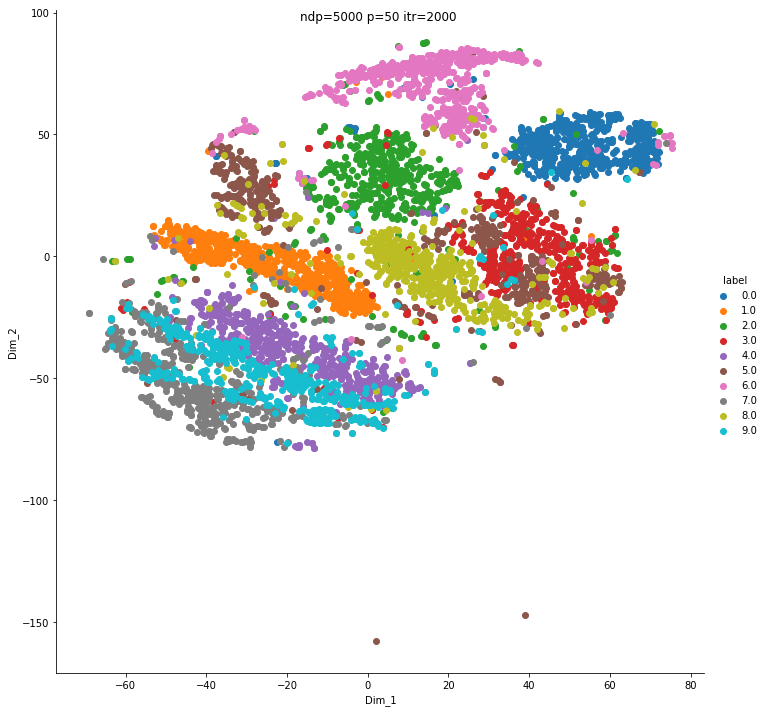

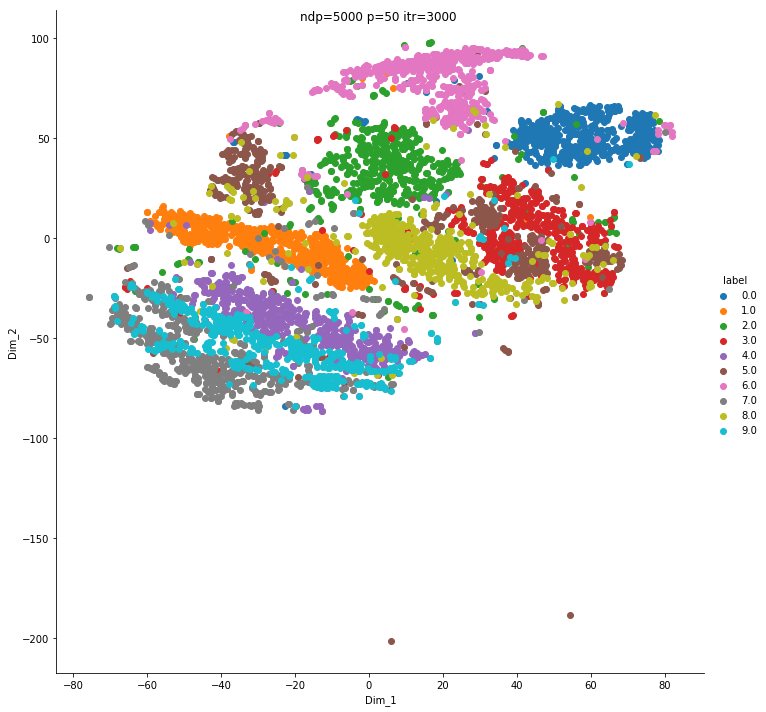

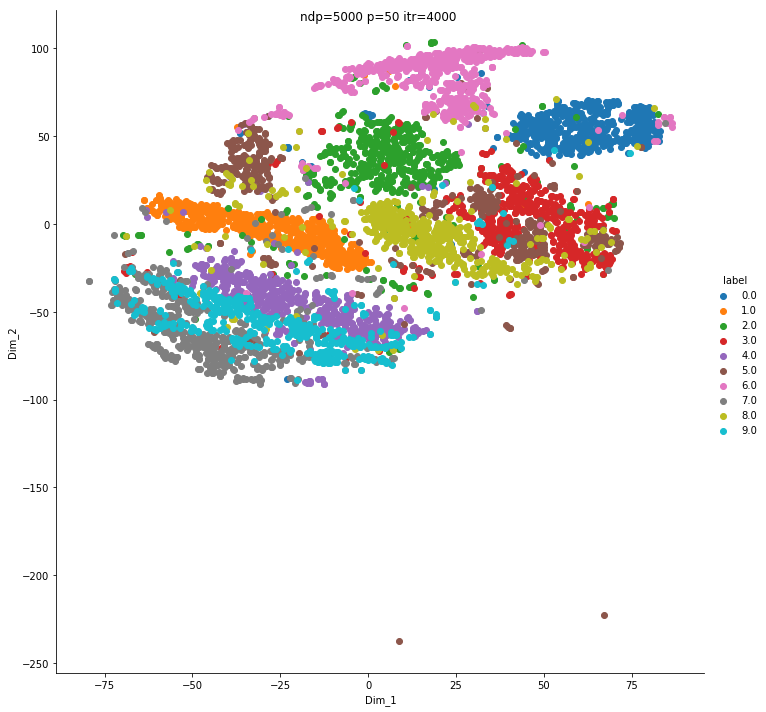

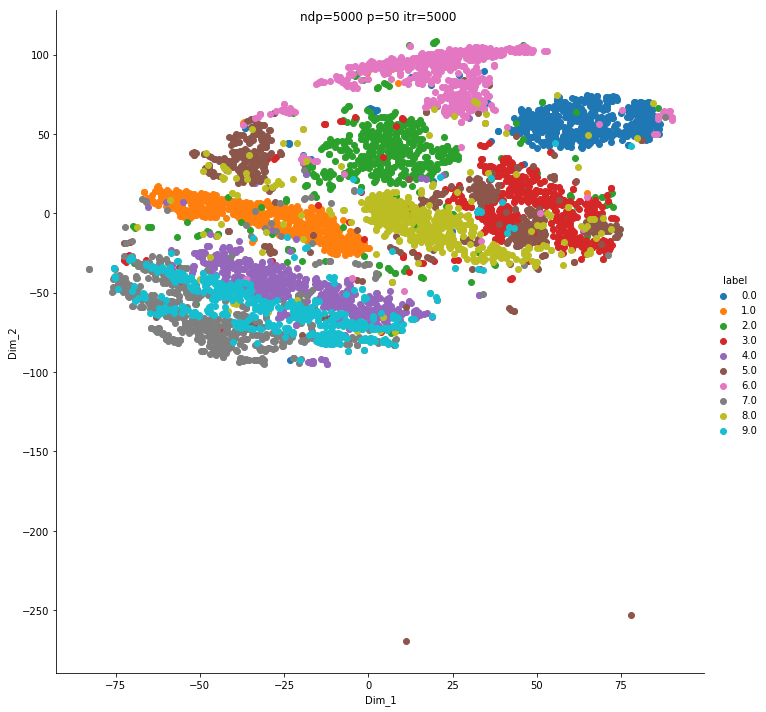

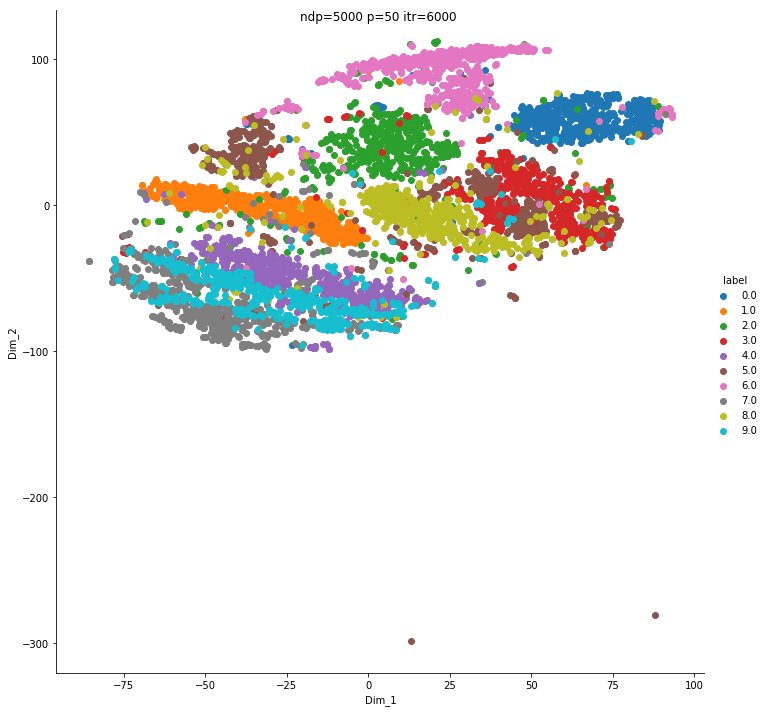

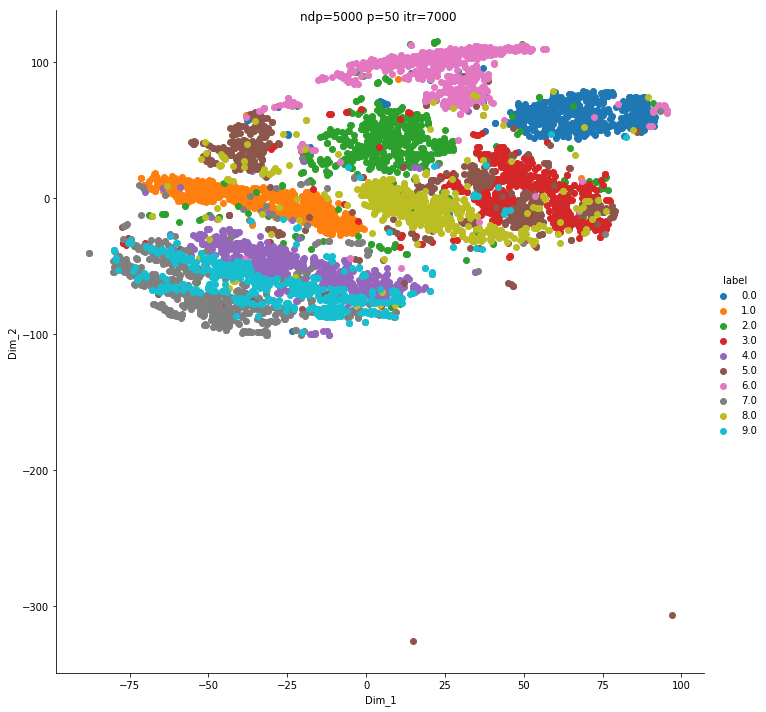

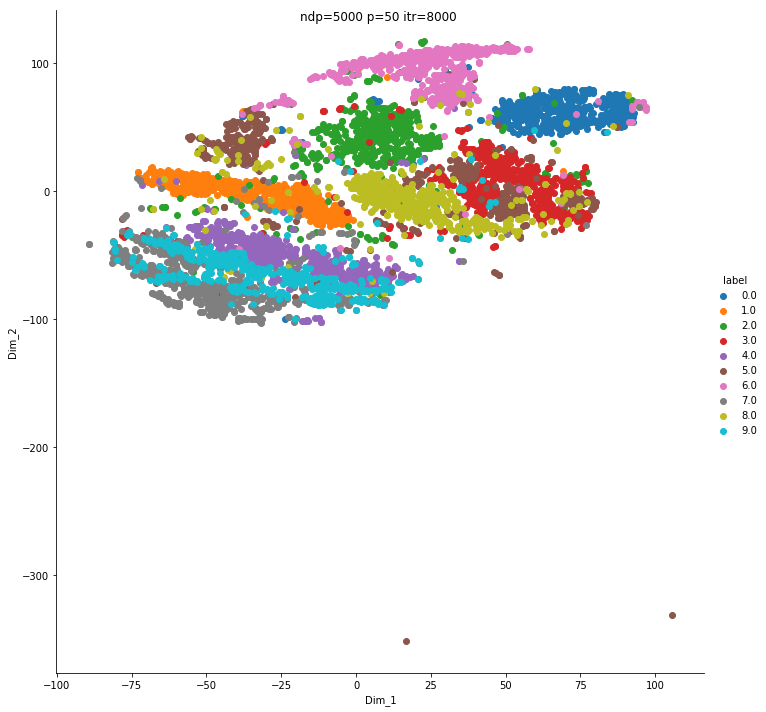

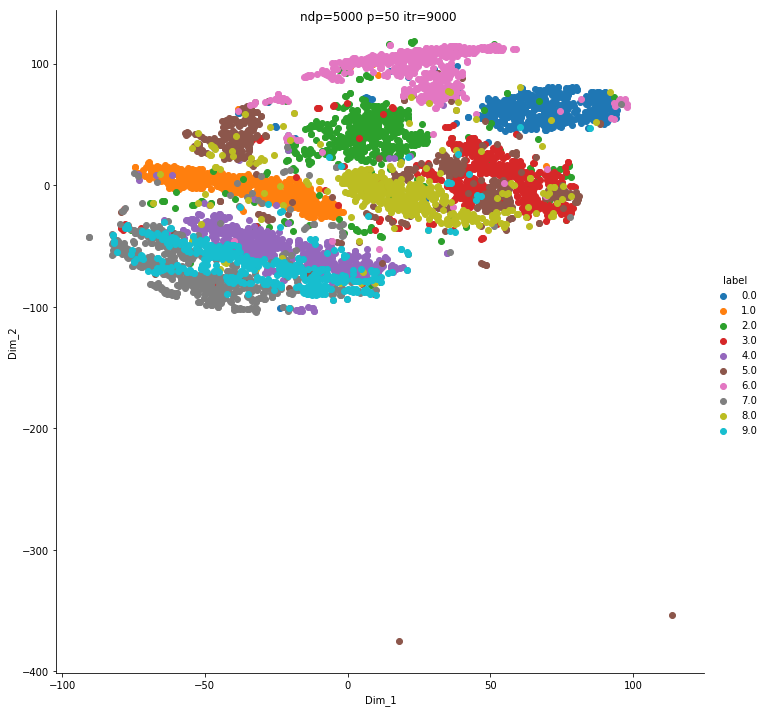

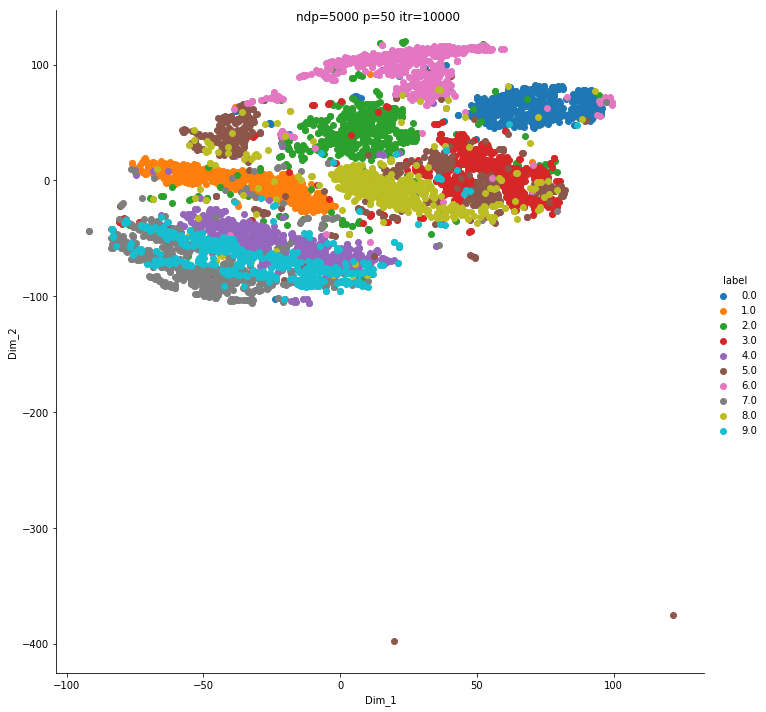

In [ ]:
genTSNEGif(standardized_data, 5000, 50, range(1000,10001,1000), 't_15000_d_5000_p_50')

### t-SNE over 15000 data points

No.Of Data Points - 15000, Perplexity - 30, Iterations - range(1000, 10001, 1000), ImageName - t_15000_d_15000_p_30
ndp=15000 p=30 itr=1000 ==> t-SNE done! Time elapsed: 382.7180435657501 seconds
ndp=15000 p=30 itr=2000 ==> t-SNE done! Time elapsed: 523.3870565891266 seconds
ndp=15000 p=30 itr=3000 ==> t-SNE done! Time elapsed: 666.2103087902069 seconds
ndp=15000 p=30 itr=4000 ==> t-SNE done! Time elapsed: 811.8709771633148 seconds
ndp=15000 p=30 itr=5000 ==> t-SNE done! Time elapsed: 946.0533254146576 seconds
ndp=15000 p=30 itr=6000 ==> t-SNE done! Time elapsed: 1095.3283324241638 seconds
ndp=15000 p=30 itr=7000 ==> t-SNE done! Time elapsed: 1233.597757101059 seconds
ndp=15000 p=30 itr=8000 ==> t-SNE done! Time elapsed: 1375.592225074768 seconds
ndp=15000 p=30 itr=9000 ==> t-SNE done! Time elapsed: 1516.2682173252106 seconds
ndp=15000 p=30 itr=10000 ==> t-SNE done! Time elapsed: 1659.1642746925354 seconds


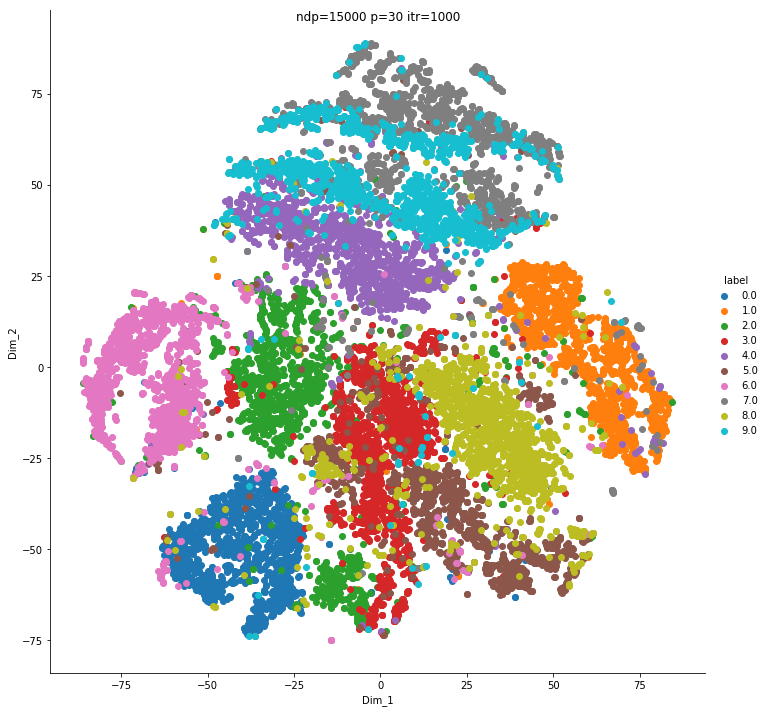

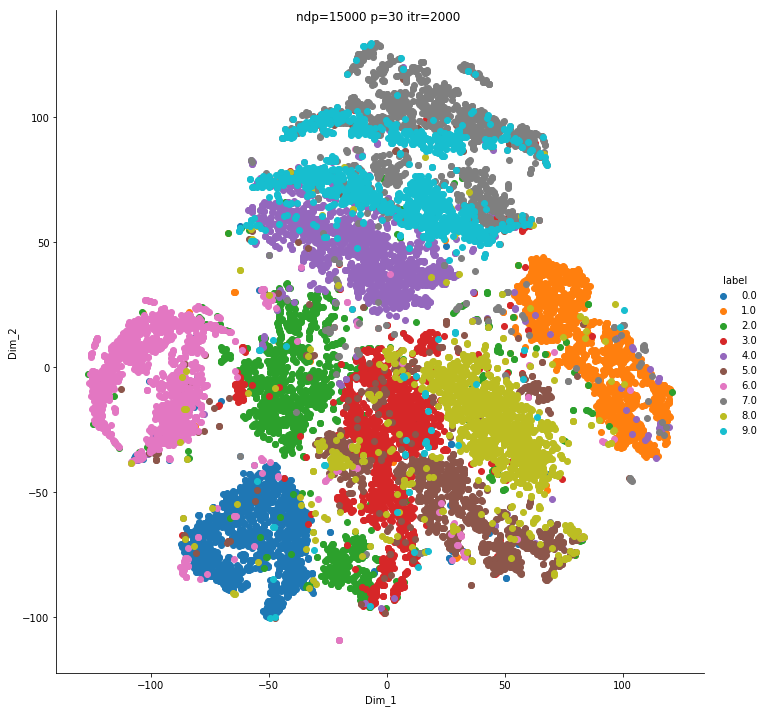

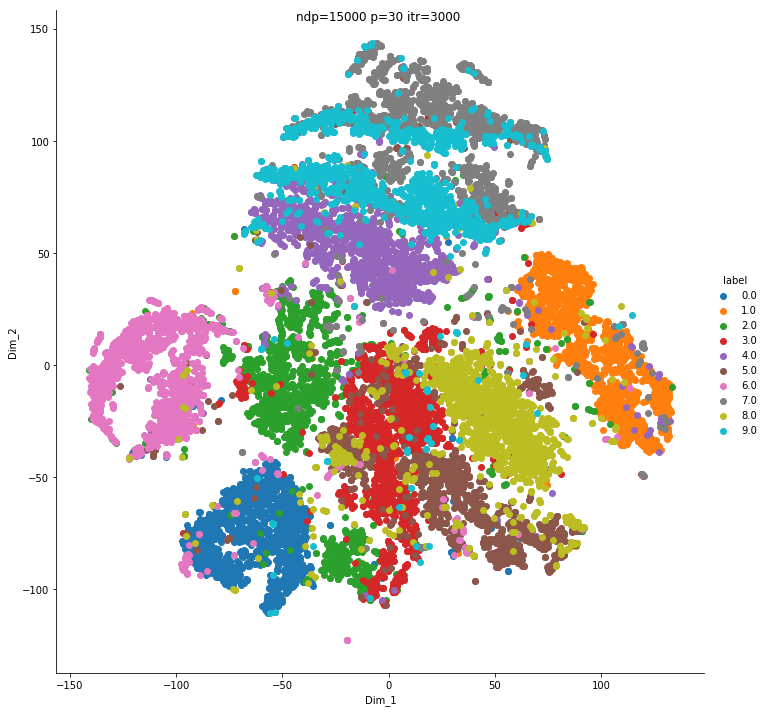

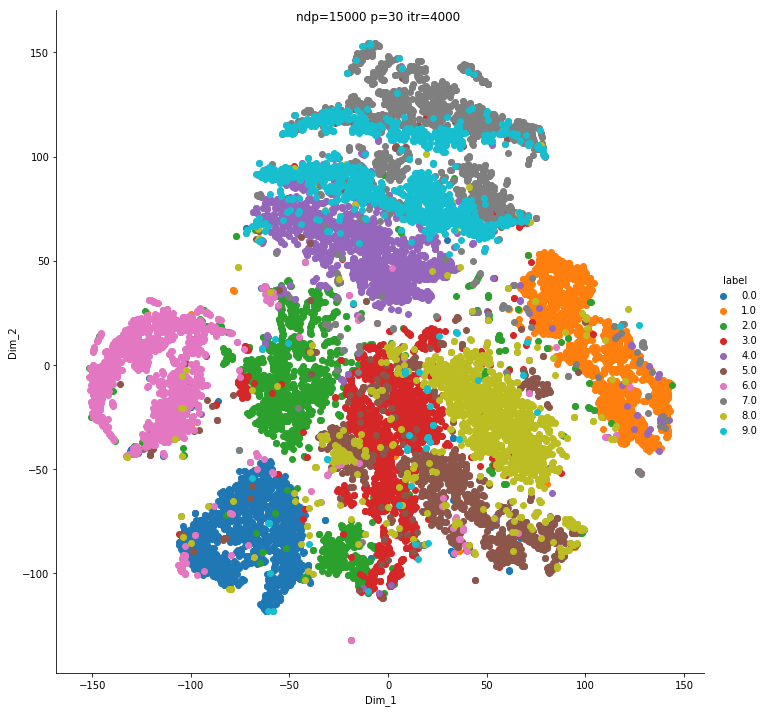

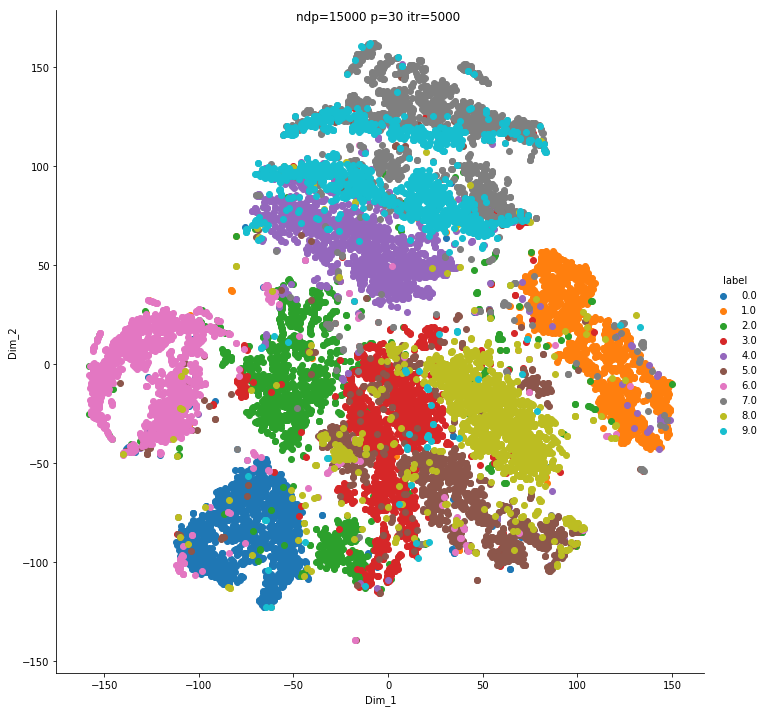

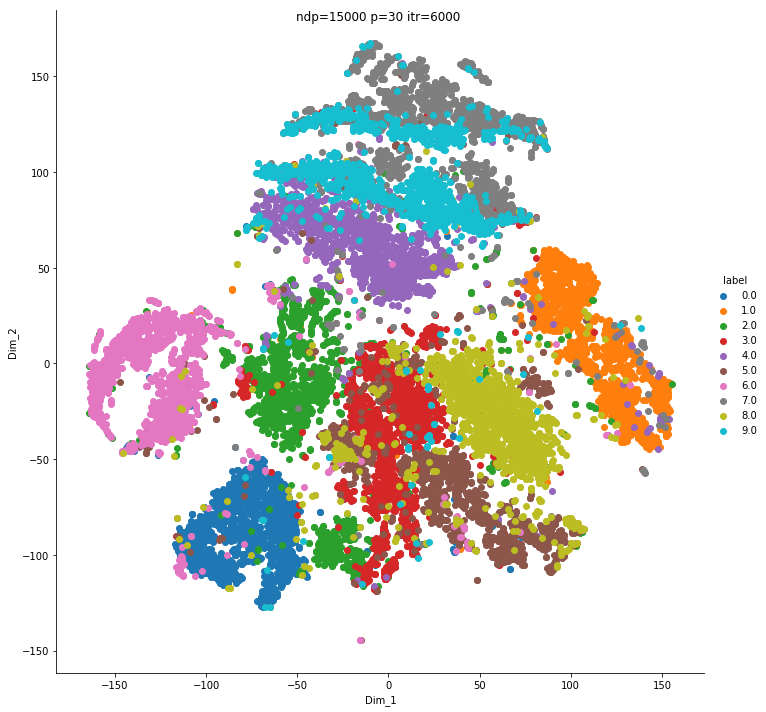

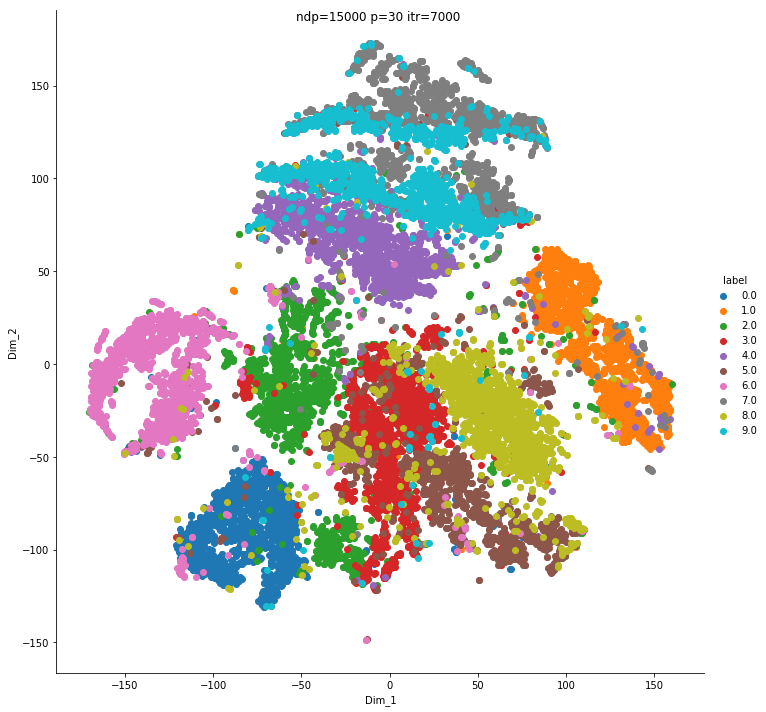

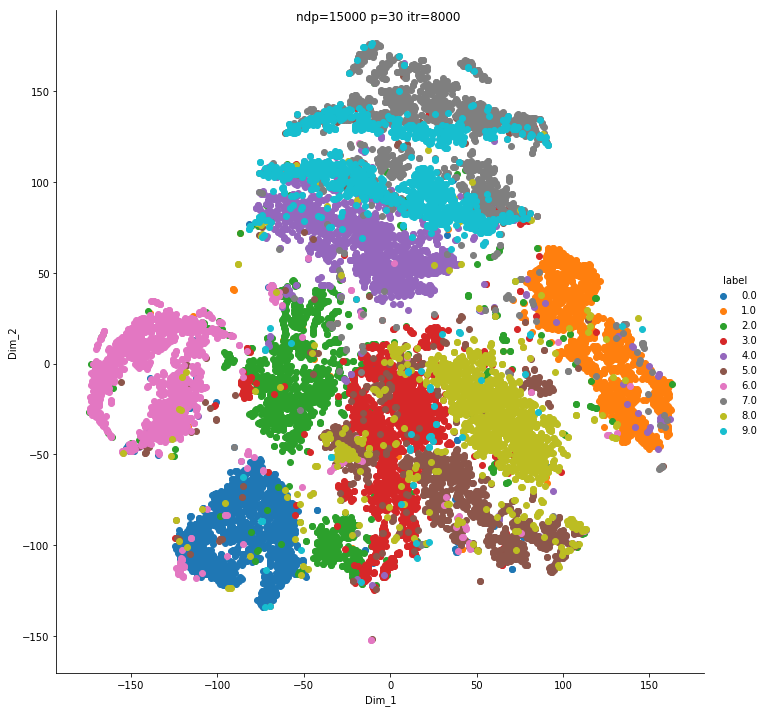

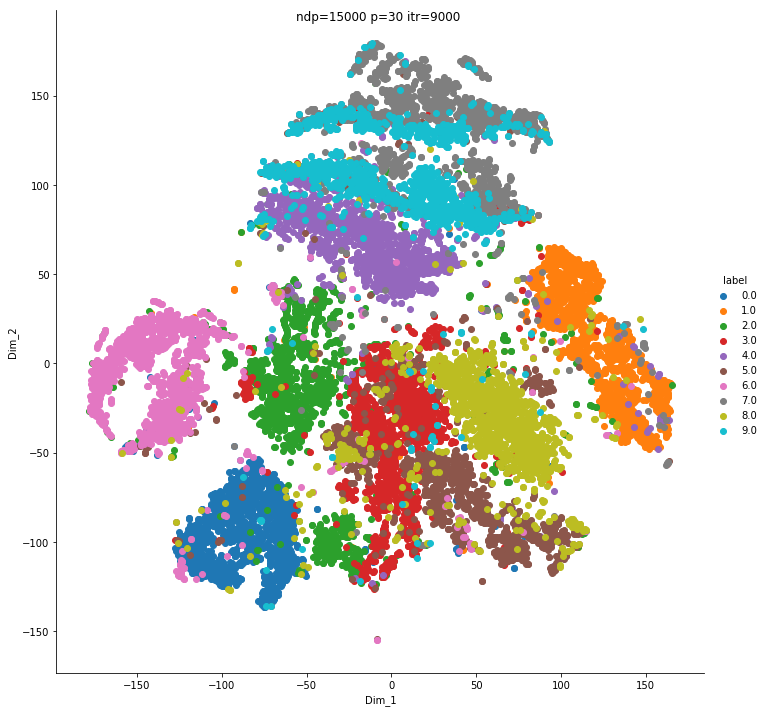

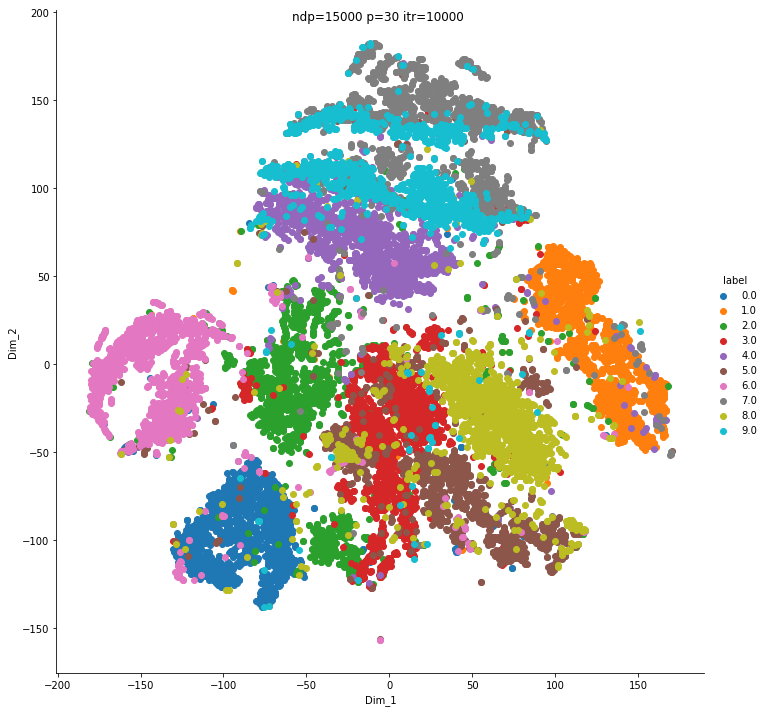

In [ ]:
genTSNEGif(standardized_data, 15000, 30, range(1000,10001,1000), 't_15000_d_15000_p_30')

No.Of Data Points - 15000, Perplexity - 50, Iterations - range(1000, 10001, 1000), ImageName - t_15000_d_15000_p_50
ndp=15000 p=50 itr=1000 ==> t-SNE done! Time elapsed: 490.88792157173157 seconds
ndp=15000 p=50 itr=2000 ==> t-SNE done! Time elapsed: 672.6919836997986 seconds
ndp=15000 p=50 itr=3000 ==> t-SNE done! Time elapsed: 866.8310749530792 seconds
ndp=15000 p=50 itr=4000 ==> t-SNE done! Time elapsed: 1070.9834036827087 seconds
ndp=15000 p=50 itr=5000 ==> t-SNE done! Time elapsed: 1280.3677475452423 seconds
ndp=15000 p=50 itr=6000 ==> t-SNE done! Time elapsed: 1484.575926065445 seconds
ndp=15000 p=50 itr=7000 ==> t-SNE done! Time elapsed: 1702.2496531009674 seconds
ndp=15000 p=50 itr=8000 ==> t-SNE done! Time elapsed: 1953.8452818393707 seconds
ndp=15000 p=50 itr=9000 ==> t-SNE done! Time elapsed: 2354.1894524097443 seconds
ndp=15000 p=50 itr=10000 ==> t-SNE done! Time elapsed: 2754.3687765598297 seconds


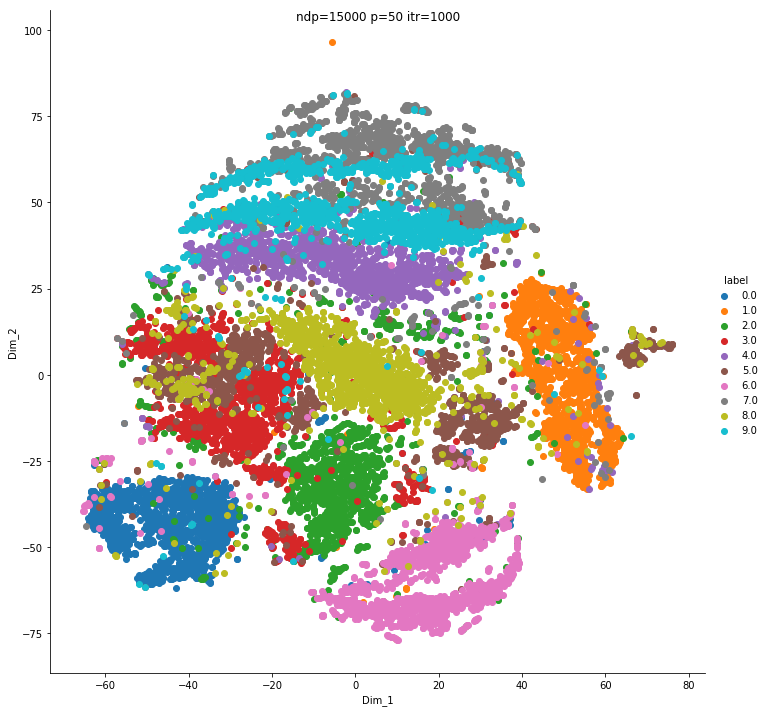

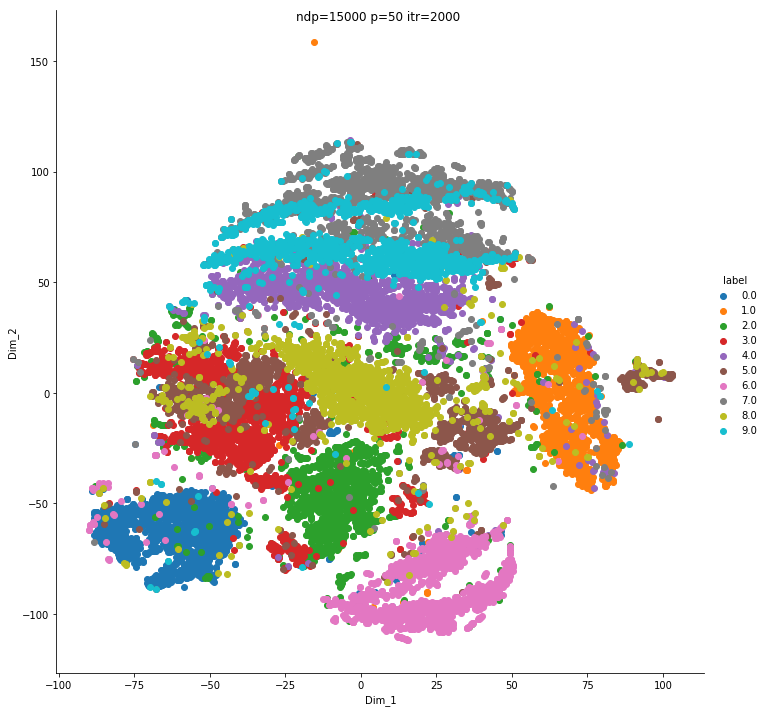

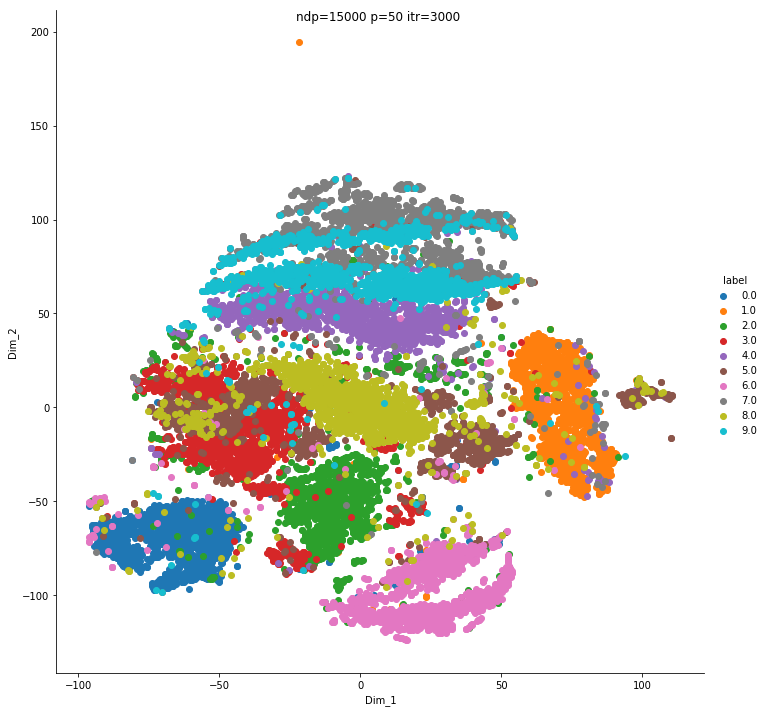

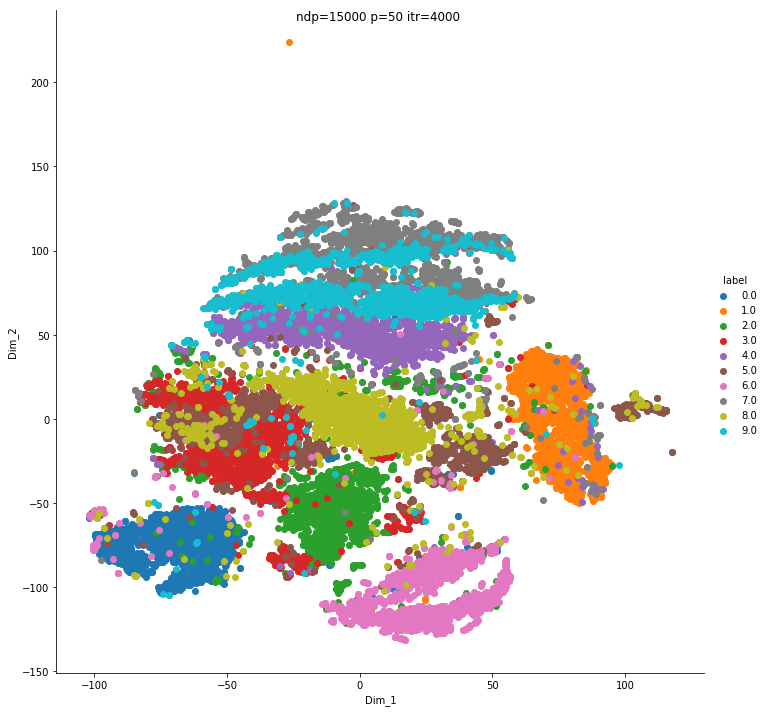

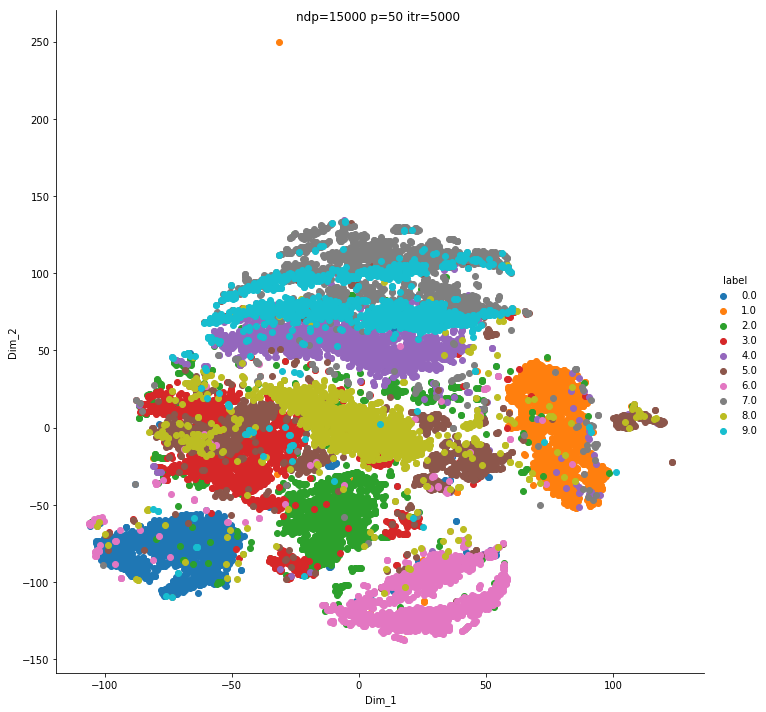

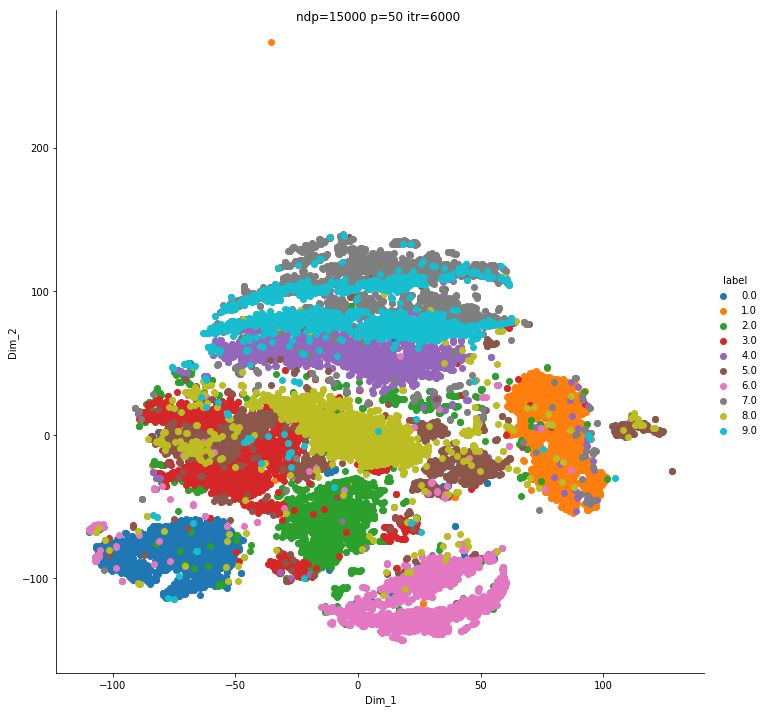

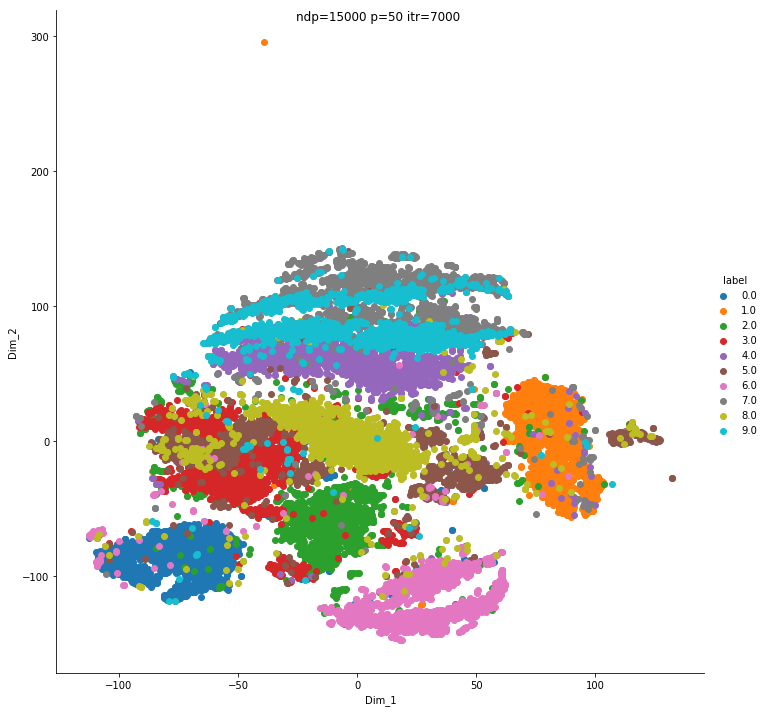

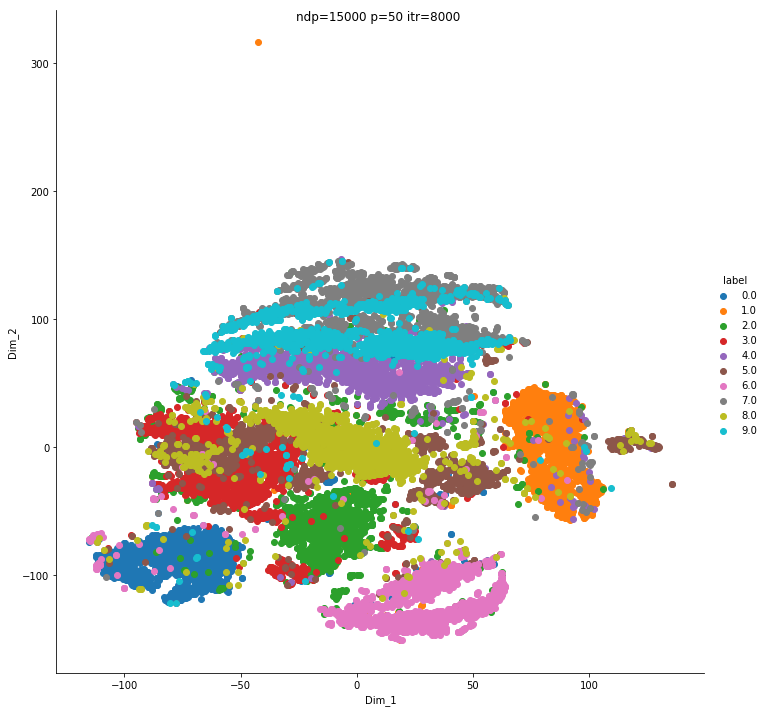

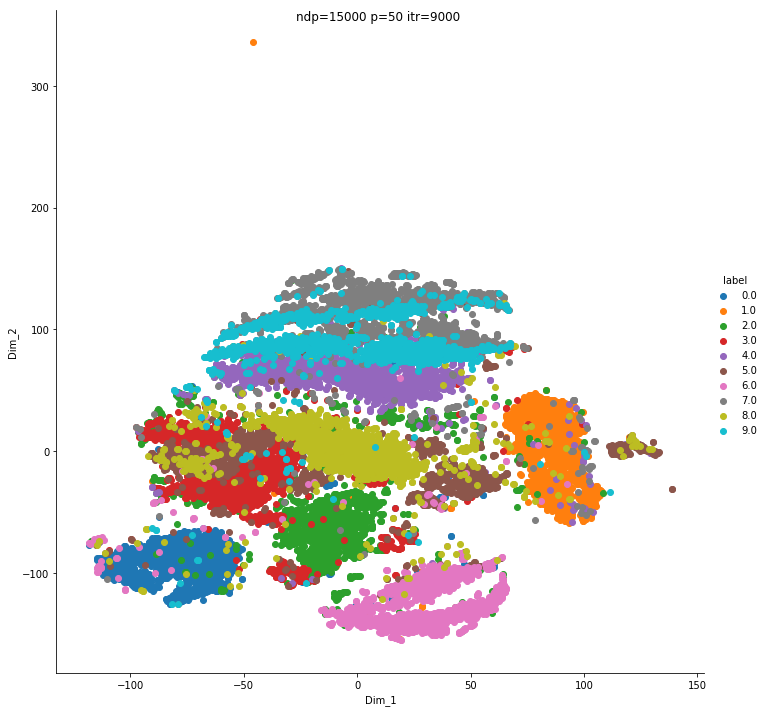

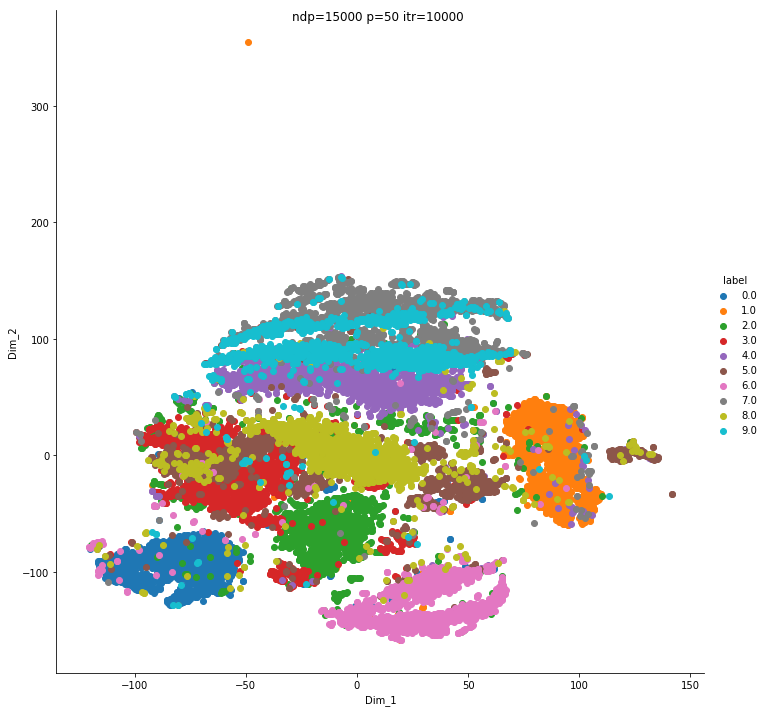

In [ ]:
genTSNEGif(standardized_data, 15000, 50, range(1000,10001,1000), 't_15000_d_15000_p_50')

## Training Size - 42000 (All)

In [6]:
# Taking 42000 images for training
training_size = 42000

d_train_labels = d_labels_all.head(training_size)
d_train_data = d_data_all.head(training_size)
print('Shape of Training Data {0}, Label {1}'.format(d_train_data.shape, d_train_labels.shape) )

# standardize the data
standardized_data = StandardScaler().fit_transform(d_train_data.astype(np.float64))
standardized_data.shape

Shape of Training Data (42000, 784), Label (42000,)


(42000, 784)

### t-SNE over 42000 data points (All)

No.Of Data Points - 42000, Perplexity - 30, Iterations - range(1000, 10001, 1000), ImageName - t_42000_d_45000_p_30
ndp=42000 p=30 itr=1000 ==> t-SNE done! Time elapsed: 2545.7131152153015 seconds
ndp=42000 p=30 itr=2000 ==> t-SNE done! Time elapsed: 3017.718147754669 seconds
ndp=42000 p=30 itr=3000 ==> t-SNE done! Time elapsed: 3508.6030945777893 seconds
ndp=42000 p=30 itr=4000 ==> t-SNE done! Time elapsed: 4017.4480690956116 seconds
ndp=42000 p=30 itr=5000 ==> t-SNE done! Time elapsed: 4526.589033126831 seconds
ndp=42000 p=30 itr=6000 ==> t-SNE done! Time elapsed: 5056.142894983292 seconds
ndp=42000 p=30 itr=7000 ==> t-SNE done! Time elapsed: 5582.91085767746 seconds
ndp=42000 p=30 itr=8000 ==> t-SNE done! Time elapsed: 6129.846672296524 seconds
ndp=42000 p=30 itr=9000 ==> t-SNE done! Time elapsed: 6672.509294986725 seconds
ndp=42000 p=30 itr=10000 ==> t-SNE done! Time elapsed: 7246.688520908356 seconds


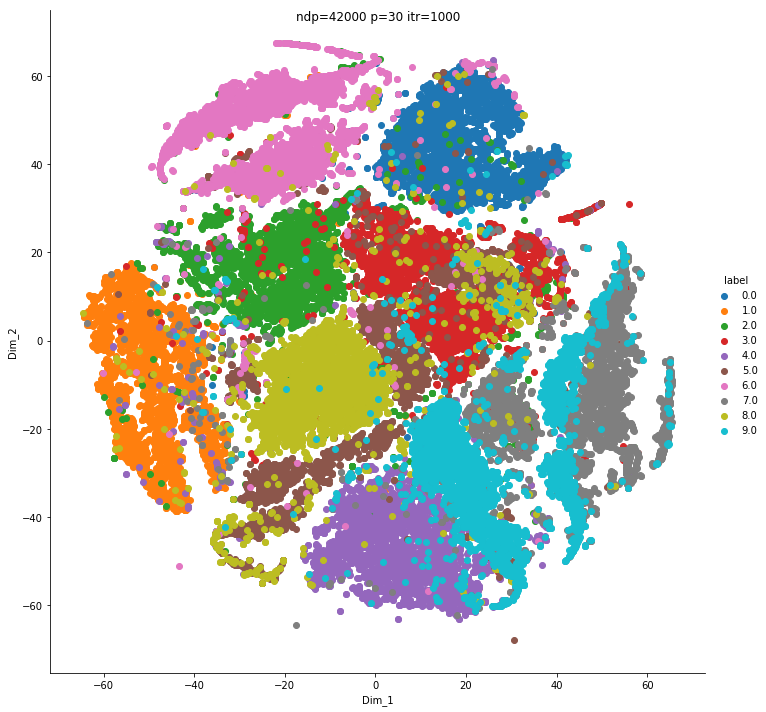

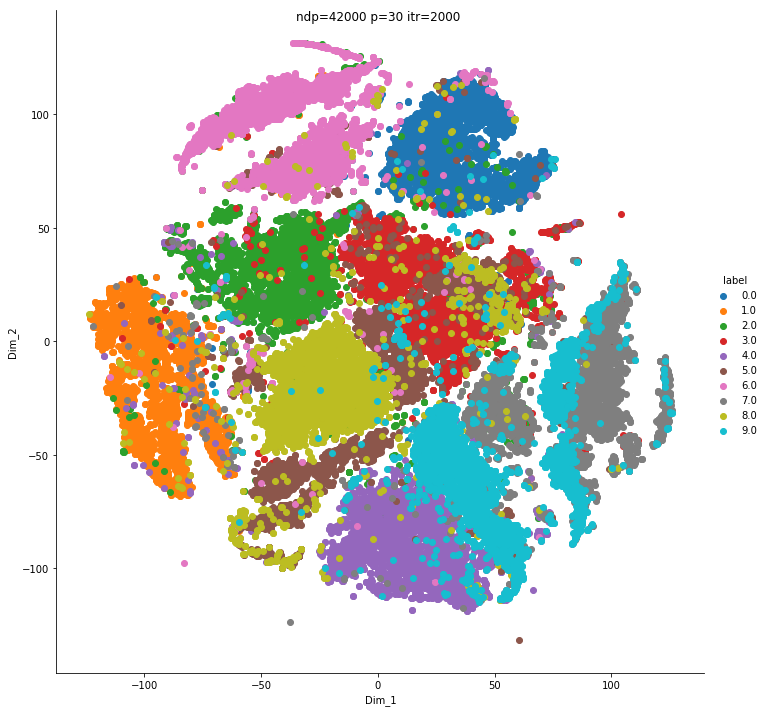

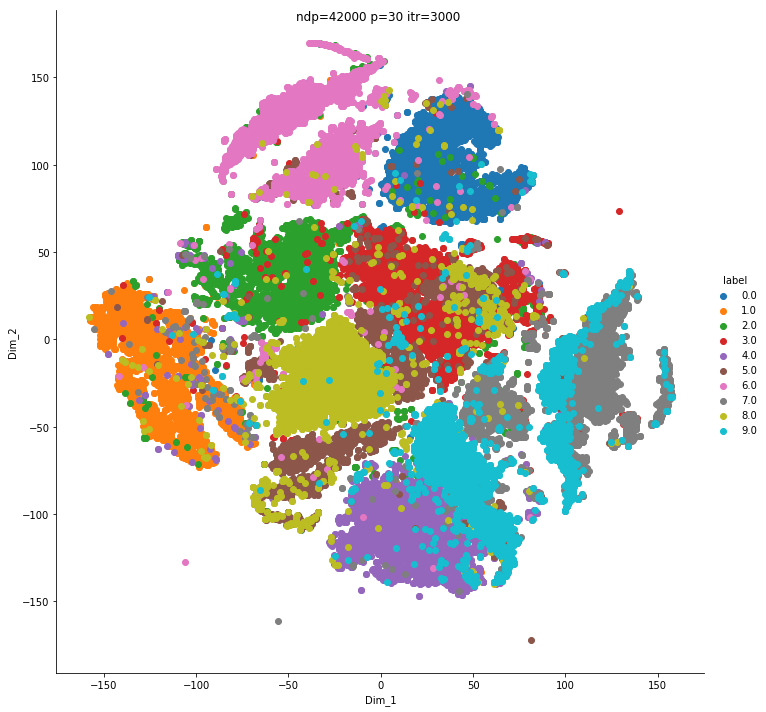

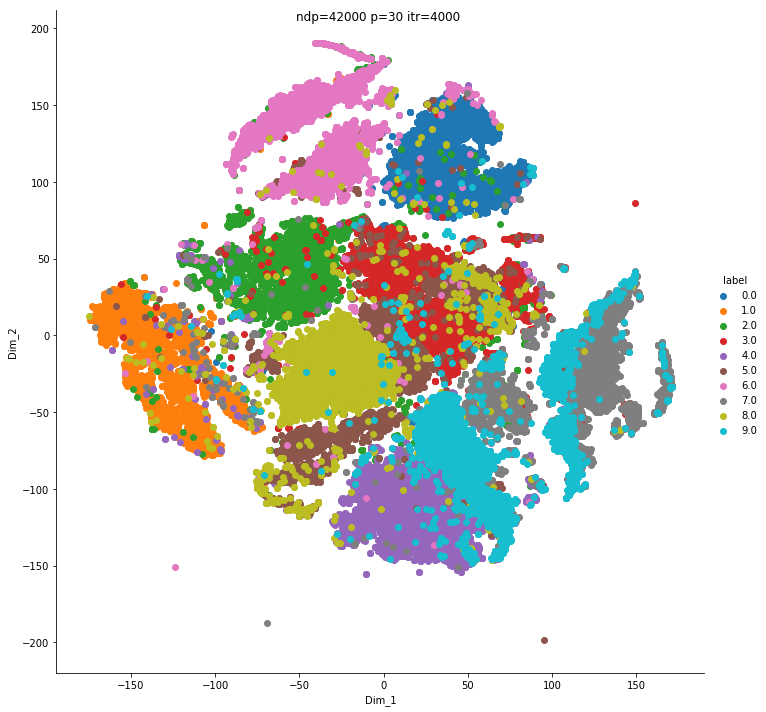

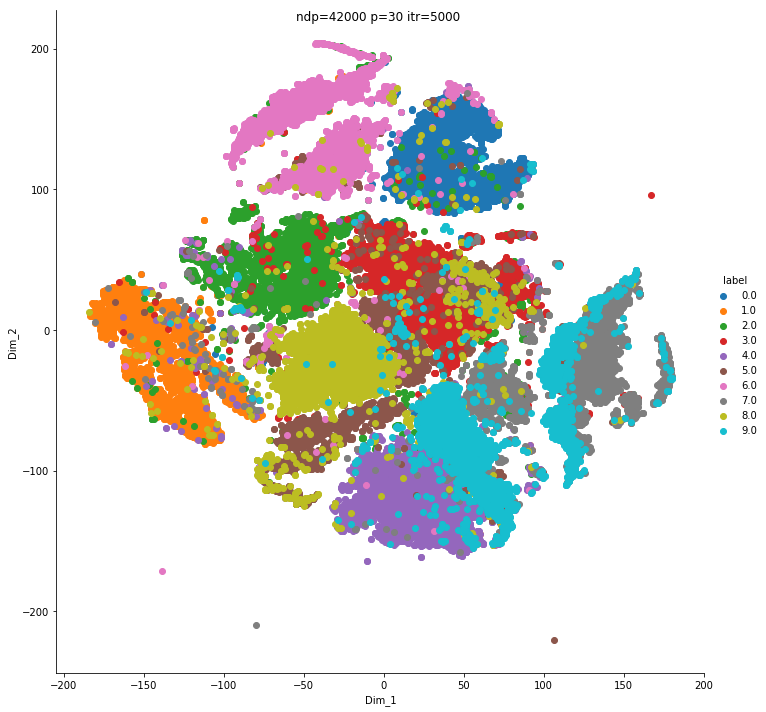

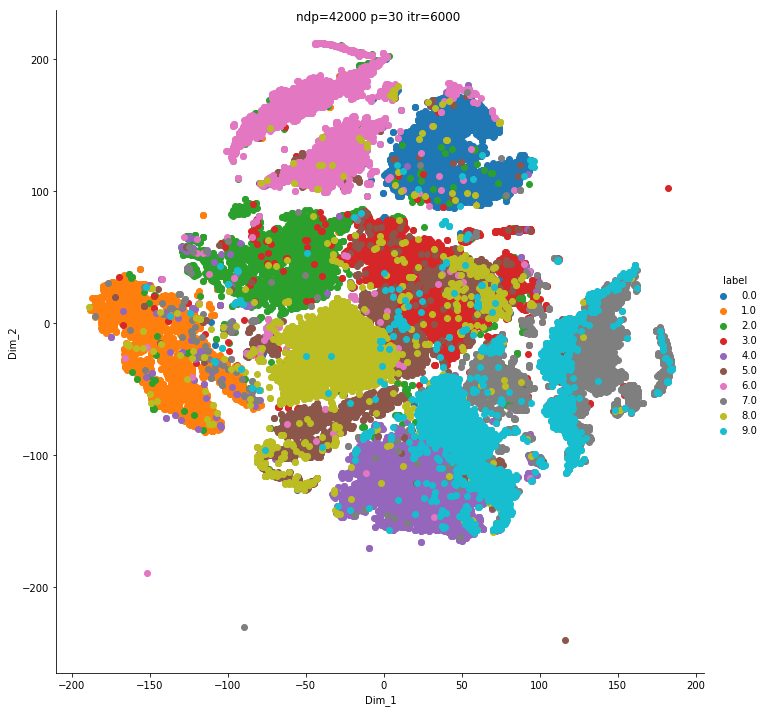

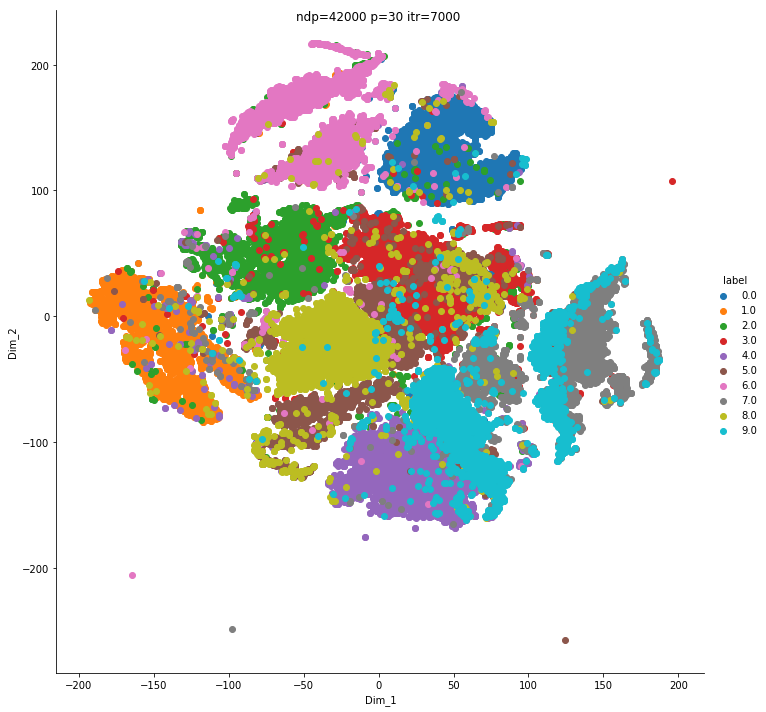

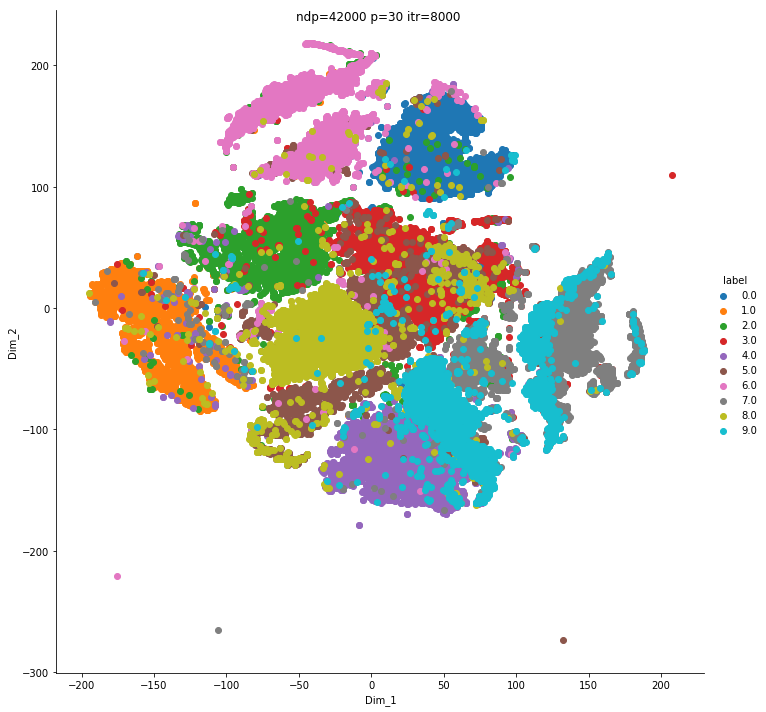

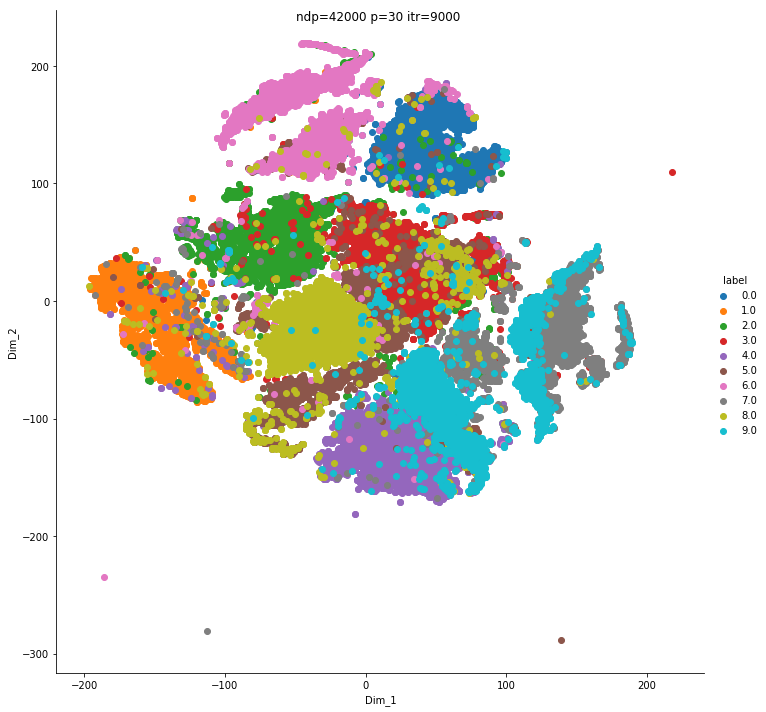

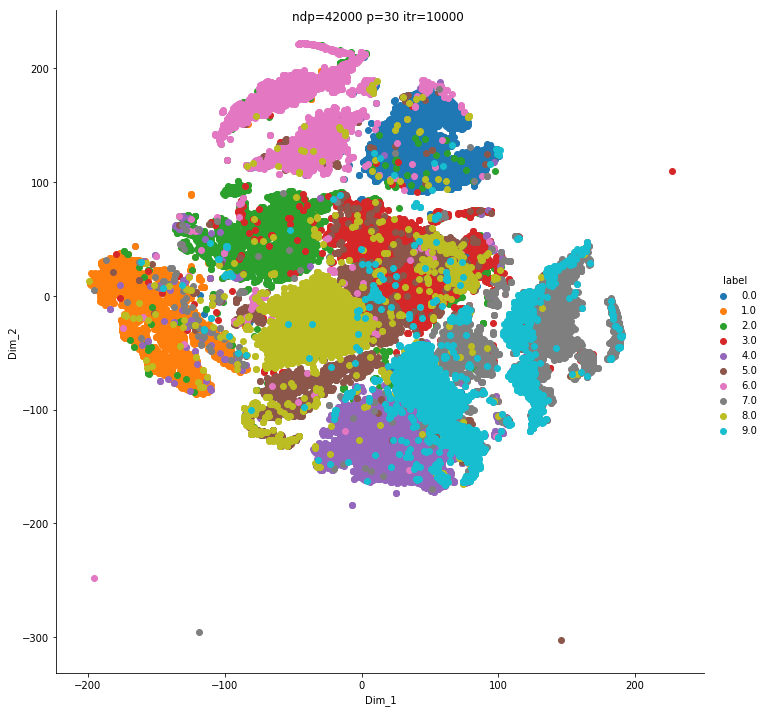

In [7]:
genTSNEGif(standardized_data, training_size, 30, range(1000,10001,1000), 't_42000_d_45000_p_30')

In [ ]:
genTSNEGif(standardized_data, training_size, 40, range(1000,5001,1000), 't_42000_d_45000_p_40')

No.Of Data Points - 42000, Perplexity - 40, Iterations - range(1000, 5001, 1000), ImageName - t_42000_d_45000_p_40
ndp=42000 p=40 itr=1000 ==> t-SNE done! Time elapsed: 2630.960303544998 seconds
ndp=42000 p=40 itr=2000 ==> t-SNE done! Time elapsed: 3065.3994250297546 seconds
ndp=42000 p=40 itr=3000 ==> t-SNE done! Time elapsed: 3598.724067926407 seconds
ndp=42000 p=40 itr=4000 ==> t-SNE done! Time elapsed: 4125.029971837997 seconds
ndp=42000 p=40 itr=5000 ==> t-SNE done! Time elapsed: 4683.721975326538 seconds


In [ ]:
genTSNEGif(standardized_data, training_size, 50, range(1000,5001,1000), 't_42000_d_45000_p_50')

# Observation

- With Perplexity 30, after 3000 iterations, image becomes stable